# Time Series Data Analysis using Pandas

- Created by Dennis Chomba

This project higlights key time-series functions used to perform time-series analysis of Building Genome Project Data investigating impact of various building attributes to its energy consumption.
Several portions of the function explanations are from: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

## The Building Data Genome Project

For this project we are using the Building Data Genome Project Data:

https://github.com/buds-lab/the-building-data-genome-project

![alt text](https://raw.githubusercontent.com/buds-lab/the-building-data-genome-project/master/figures/buildingdatagenome1.png)

This project is a set of 500+ time-series meter data from buildings.
We are going to use some of the buildings to analyse time-series data from IoT networks. To protect the privacy of the data sources, we have renamed the buildings using names of people.
First, we will load the libraries:

# PROJECT A

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")

# Exploring Data for the Office_Abigail Building

To give an overview of the typical data from the `Building Data Genome Project`, we can load data from a single building: -- this building has the name `Abilgail`.
Observe that the data set has a column called `timestamp`. Loading the DataFrame the usual way then this column will just be a string data type:


In [4]:
abigail = pd.read_csv('Office_Abigail.csv', index_col = "timestamp")

In [5]:
abigail.head()

Office_Abigail
timestamp                          
2015-01-01 00:00:00            5.33
2015-01-01 01:00:00            5.41
2015-01-01 02:00:00            5.60
2015-01-01 03:00:00            6.50
2015-01-01 04:00:00            5.39

In [6]:
abigail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9+ KB


In [7]:
abigail.index[0] # observe that the output is in string format. Bt we do not want that since we would liike to perform a time series analysis.

'2015-01-01 00:00:00'

## Setting the `timestamp` index to a *datetime* object

First we indicate to Pandas that the index 'timestamp', is not just a regular string -- it has information related to date and time attributes including whether the day is **Monday** or **Tuesday** or whether that is a weekday or weekend.

In that case we define from the `.read_csv()` function that it should **parse** the index and try to convert it into a *datetime* object:

In [8]:
abigail = pd.read_csv('Office_Abigail.csv', index_col = "timestamp", parse_dates=True)

In [9]:
abigail.head()

Office_Abigail
timestamp                          
2015-01-01 00:00:00            5.33
2015-01-01 01:00:00            5.41
2015-01-01 02:00:00            5.60
2015-01-01 03:00:00            6.50
2015-01-01 04:00:00            5.39

In [10]:
abigail.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [11]:
abigail.index[0] # Observe that by parsing the timestamp data, we converted it to datetime format

Timestamp('2015-01-01 00:00:00')

## `Timestamp` object attributes

It is noted that the index is not what's known as a `DateTimeIndex` and each of the index items is a `Timestamp` object. This allows us to object things like what day of the week it is and other attributes.

More info here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html


In [12]:
abigail.index

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-12-31 14:00:00', '2015-12-31 15:00:00',
               '2015-12-31 16:00:00', '2015-12-31 17:00:00',
               '2015-12-31 18:00:00', '2015-12-31 19:00:00',
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=8760, freq=None)

In [13]:
# What month?
abigail.index[0].month

1

In [14]:
# What day of the week?
abigail.index[0].dayofweek

3

In [15]:
# What week? 1st, 2nd, 3rd, 4th weekof the Month?
abigail.index[0].week

1

In [16]:
# Is it a leap year?
abigail.index[0].is_leap_year

False

In [17]:
abigail.index[0].hour

0

## Plotting simple line charts of time-series data

First, we can explore the data as a line chart. This gives us an understanding of the shape, frequency and potential for outliers.

<Axes: xlabel='timestamp'>

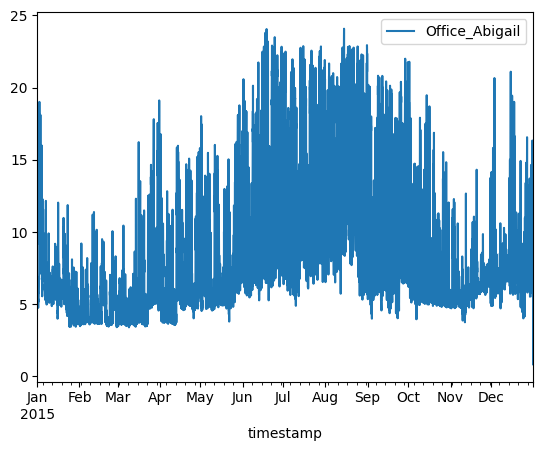

In [18]:
abigail.plot()

<Axes: xlabel='timestamp'>

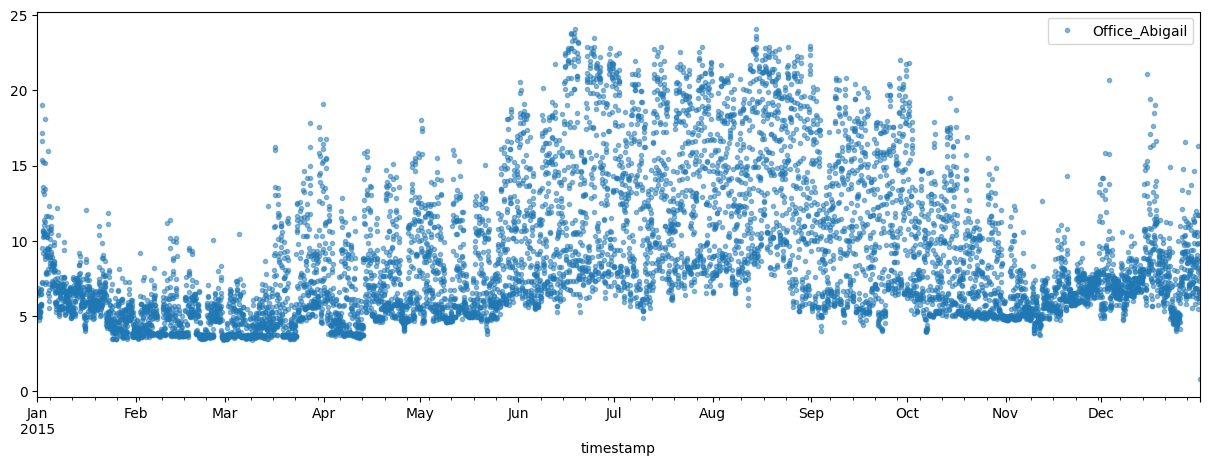

In [19]:
abigail.plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 5))

# Resample the data to other frequencies

From the observed plots above, it is useful to resample the time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we’re working with in this project was downsampled from the original hourly time series. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.

Here, we will foces on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s `resample()` method, which splits the DatetimeIndex into time bins and groups the data by time bin. The `resample()` method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as `mean()`, `median()`, `sum()`, etc., to the data group for each time bin." -- from: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/



In [20]:
abigail.head()

Office_Abigail
timestamp                          
2015-01-01 00:00:00            5.33
2015-01-01 01:00:00            5.41
2015-01-01 02:00:00            5.60
2015-01-01 03:00:00            6.50
2015-01-01 04:00:00            5.39

We can first resample to daily data by using the `D` as an attribute in the `.resample()` function to indicate that we want *daily* data aggregation. We use the `.mean()` function to indicate that we want the function to take the average across each day's hourly readings to produce the aggregated value for the day

In [21]:
abigail_daily = abigail.resample("D").mean()

In [22]:
abigail_daily.head()

Office_Abigail
timestamp                 
2015-01-01        5.533750
2015-01-02       10.226771
2015-01-03       10.439167
2015-01-04        9.073333
2015-01-05        8.677500

<Axes: xlabel='timestamp'>

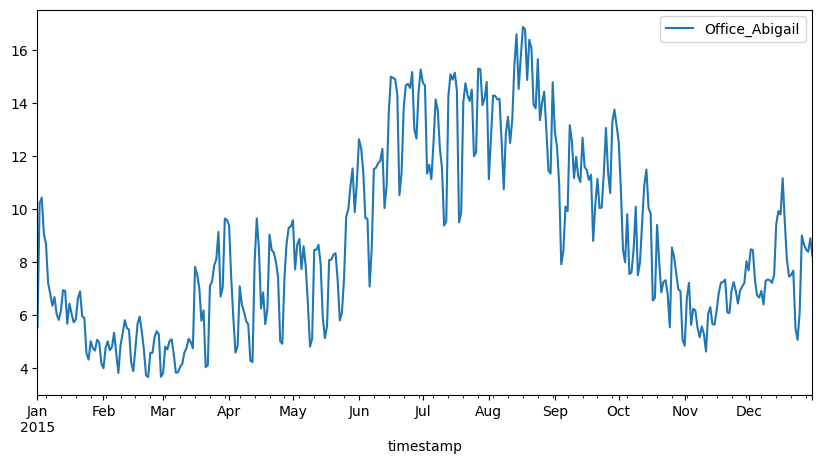

In [23]:
abigail_daily.plot(figsize=(10,5))

We can do the same to create *monthly* data and other aggregations

<Axes: xlabel='timestamp'>

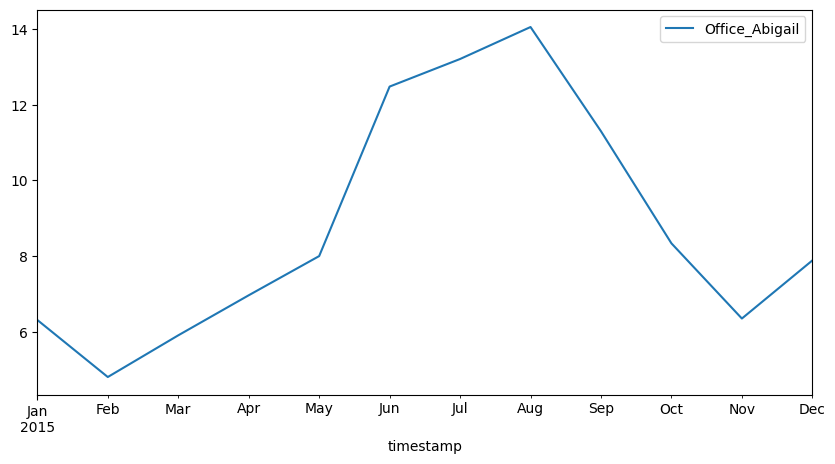

In [24]:
abigail_daily.resample("M").mean().plot(figsize=(10,5))

## Frequencies

The Pandas Library has dozens of **frequencies** that can be used to resample data -- the detailed list is here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


### Truncating the Time-Series Data

The truncate function will allow us to slice the data into smaller dataframes according to a time range

Pandas DataFrame.truncate() function is used to truncate a Series or DataFrame before and after some index value. This is a useful shorthand for boolean indexing based on index values above or below certain thresholds.

https://www.geeksforgeeks.org/python-pandas-dataframe-truncate/

In [25]:
abigail_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [26]:
abigail_daily_june = abigail_daily.truncate(before = '2015-06-01', after='2015-07-01')

<Axes: xlabel='timestamp'>

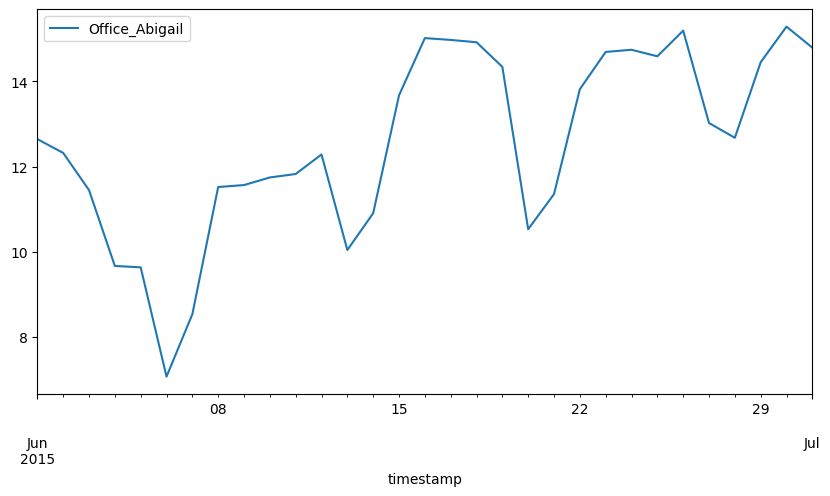

In [27]:
abigail_daily_june.plot(figsize=(10,5))

# Trends Analysis and Rolling Windows

Observations from the data exploration operations above Time series data, we see that it exhibits some slow, gradual variability in addition to higher frequency variability such as seasonality and noise.
We can hen employ an easy way to visualize these trends with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, we will look at rolling means on those two time scales.

I suggest the following link for more information on rolling means:  https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

<Axes: xlabel='timestamp'>

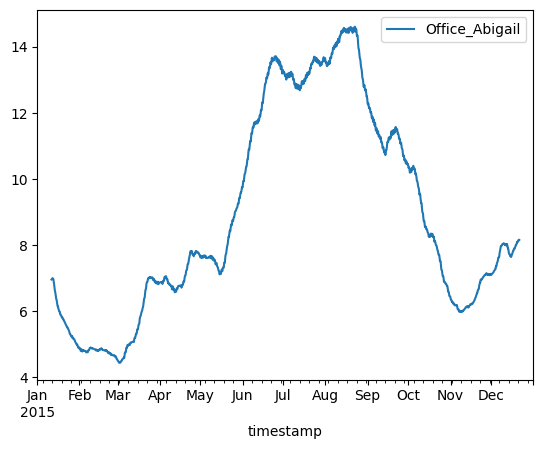

In [28]:
abigail.rolling(window=500, center=True, min_periods=500).mean().plot()

# Analysis of a large number of buildings at once

As earlier stated, Building Genome Data has 500+ buildings and their data. Since we have explored how the typical data from an individual building looks like, we now consider exploring a larger group of buildings to understand how the builings used for timeseries analysis fair as a group.

In [29]:
# All the buildings from the meter data.csv file
os.listdir()

['Office_Abigail.xlsx',
 'Office_Andrea.csv',
 'Office_Al.csv',
 'Office_Annika.csv',
 'Office_Angelo.csv',
 'Office_Angelica.csv',
 'Office_Angelina.csv',
 'Office_Ashanti.csv',
 'Office_Alyson.csv',
 'Office_Aliyah.csv',
 'Office_Allyson.csv',
 'Office_Anastasia.csv',
 'Office_Abbey.csv',
 'Office_Aubrey.csv',
 'Office_Abigail.csv',
 'Office_Alannah.csv',
 'Office_Amelie.csv',
 'Office_Amelia.csv',
 'Office_Autumn.csv',
 'Office_Asher.csv',
 'Office_Penny.csv',
 'Office_Ayesha.csv',
 'Office_Ava.csv',
 'Office_Phebian.csv',
 'Office_Ayden.csv',
 'Office_Pam.csv',
 'Office_Benjamin.csv',
 'Office_Cecelia.csv',
 'PrimClass_Angel.csv',
 'Office_Bianca.csv',
 'Office_Benthe.csv',
 'Office_Caleb.csv',
 'Office_Bryon.csv',
 'PrimClass_Eoghan.csv',
 'Office_Bobbi.csv',
 'PrimClass_Esmeralda.csv',
 'Office_Brian.csv',
 'Office_Carissa.csv',
 'Office_Carolina.csv',
 'Office_Catherine.csv',
 'Office_Charles.csv',
 'Office_Cameron.csv',
 'Office_Clarissa.csv',
 'Office_Clinton.csv',
 'Office_Cl

Using that list, we will analyse all the buildings that have a time range of 2015

In [30]:
list_of_buildings = ['UnivClass_Andy.csv',
'Office_Abbey.csv',
'Office_Alannah.csv',
'PrimClass_Angel.csv',
'Office_Penny.csv',
'Office_Pam.csv',
'UnivClass_Craig.csv',
'UnivLab_Allison.csv',
'Office_Amelia.csv',
'Office_Aubrey.csv',
'Office_Cecelia.csv',
'UnivClass_Conor.csv',
'Office_Autumn.csv',
'Office_Abigail.csv',
'Office_Amelie.csv',
'UnivClass_Alfredo.csv',
'Office_Phebian.csv',
'UnivLab_Adrian.csv',
'UnivDorm_Curtis.csv',
'UnivLab_Angie.csv',
'UnivClass_Amya.csv',
'UnivDorm_Cian.csv',
'UnivClass_Ciara.csv',
'UnivLab_Audra.csv',
'UnivLab_Ciel.csv',
'UnivLab_Cesar.csv']

In [31]:
# Creating a Function to concatenate all the buiildings data into one Dataframe
all_data_list = []
for buildingname in list_of_buildings:
  df = pd.read_csv(buildingname, index_col = "timestamp", parse_dates=True)
  df = df.resample("H").mean()
  all_data_list.append(df)
all_data = pd.concat(all_data_list, axis=1)
all_data.head()

UnivClass_Andy  Office_Abbey  Office_Alannah  \
timestamp                                                           
2015-01-01 00:00:00          1.2800         27.79           22.14   
2015-01-01 01:00:00          0.6000         27.66           21.80   
2015-01-01 02:00:00          0.8400         27.13           15.68   
2015-01-01 03:00:00          0.3975         27.34           17.39   
2015-01-01 04:00:00         11.0800         27.34           21.04   

                     PrimClass_Angel  Office_Penny  Office_Pam  \
timestamp                                                        
2015-01-01 00:00:00             6.54     25.275000   61.883333   
2015-01-01 01:00:00             6.61     25.625000   60.191667   
2015-01-01 02:00:00             6.54     25.158333   80.350000   
2015-01-01 03:00:00             6.53     24.900000   79.575000   
2015-01-01 04:00:00             6.48     26.358333   77.741667   

                     UnivClass_Craig  UnivLab_Allison  Office_Amelia  \
timestamp                                                              
2015-01-01 00:00:00            8.825             3.79           3.96   
2015-01-01 01:00:00            7.450             3.68           4.44   
2015-01-01 02:00:00            7.475             3.61           4.82   
2015-01-01 03:00:00            7.575             3.61           4.28   
2015-01-01 04:00:00            7.500             3.48          18.79   

                     Office_Aubrey  ...  Office_Phebian  UnivLab_Adrian  \
timestamp                           ...                                   
2015-01-01 00:00:00           9.50  ...       50.016667          126.56   
2015-01-01 01:00:00           9.50  ...       65.800000          149.71   
2015-01-01 02:00:00           9.47  ...       68.066667          156.19   
2015-01-01 03:00:00           9.68  ...       73.041667          157.43   
2015-01-01 04:00:00           9.37  ...       83.950000          170.58   

                     UnivDorm_Curtis  UnivLab_Angie  UnivClass_Amya  \
timestamp                                                             
2015-01-01 00:00:00        27.150000          10.22           31.42   
2015-01-01 01:00:00        25.424999          10.11           40.00   
2015-01-01 02:00:00        25.075001          10.12           38.03   
2015-01-01 03:00:00        26.924999          10.06           39.62   
2015-01-01 04:00:00        26.125000          10.05           38.93   

                     UnivDorm_Cian  UnivClass_Ciara  UnivLab_Audra  \
timestamp                                                            
2015-01-01 00:00:00         13.775       136.824997          17.69   
2015-01-01 01:00:00         14.050       144.025002          17.50   
2015-01-01 02:00:00         13.725       144.875000          17.55   
2015-01-01 03:00:00         14.100       142.375000          17.61   
2015-01-01 04:00:00         13.500       148.199997          17.24   

                     UnivLab_Ciel  UnivLab_Cesar  
timestamp                                         
2015-01-01 00:00:00    369.749992          5.025  
2015-01-01 01:00:00    366.575005          4.600  
2015-01-01 02:00:00    366.074997          4.750  
2015-01-01 03:00:00    364.124992          4.700  
2015-01-01 04:00:00    368.049988          4.575  

[5 rows x 26 columns]

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UnivClass_Andy     8760 non-null   float64
 1   Office_Abbey       8760 non-null   float64
 2   Office_Alannah     8760 non-null   float64
 3   PrimClass_Angel    8760 non-null   float64
 4   Office_Penny       8759 non-null   float64
 5   Office_Pam         8759 non-null   float64
 6   UnivClass_Craig    8759 non-null   float64
 7   UnivLab_Allison    8760 non-null   float64
 8   Office_Amelia      8760 non-null   float64
 9   Office_Aubrey      8760 non-null   float64
 10  Office_Cecelia     8759 non-null   float64
 11  UnivClass_Conor    8759 non-null   float64
 12  Office_Autumn      8760 non-null   float64
 13  Office_Abigail     8760 non-null   float64
 14  Office_Amelie      8760 non-null   float64
 15  UnivClass_Alfredo  8760 non-

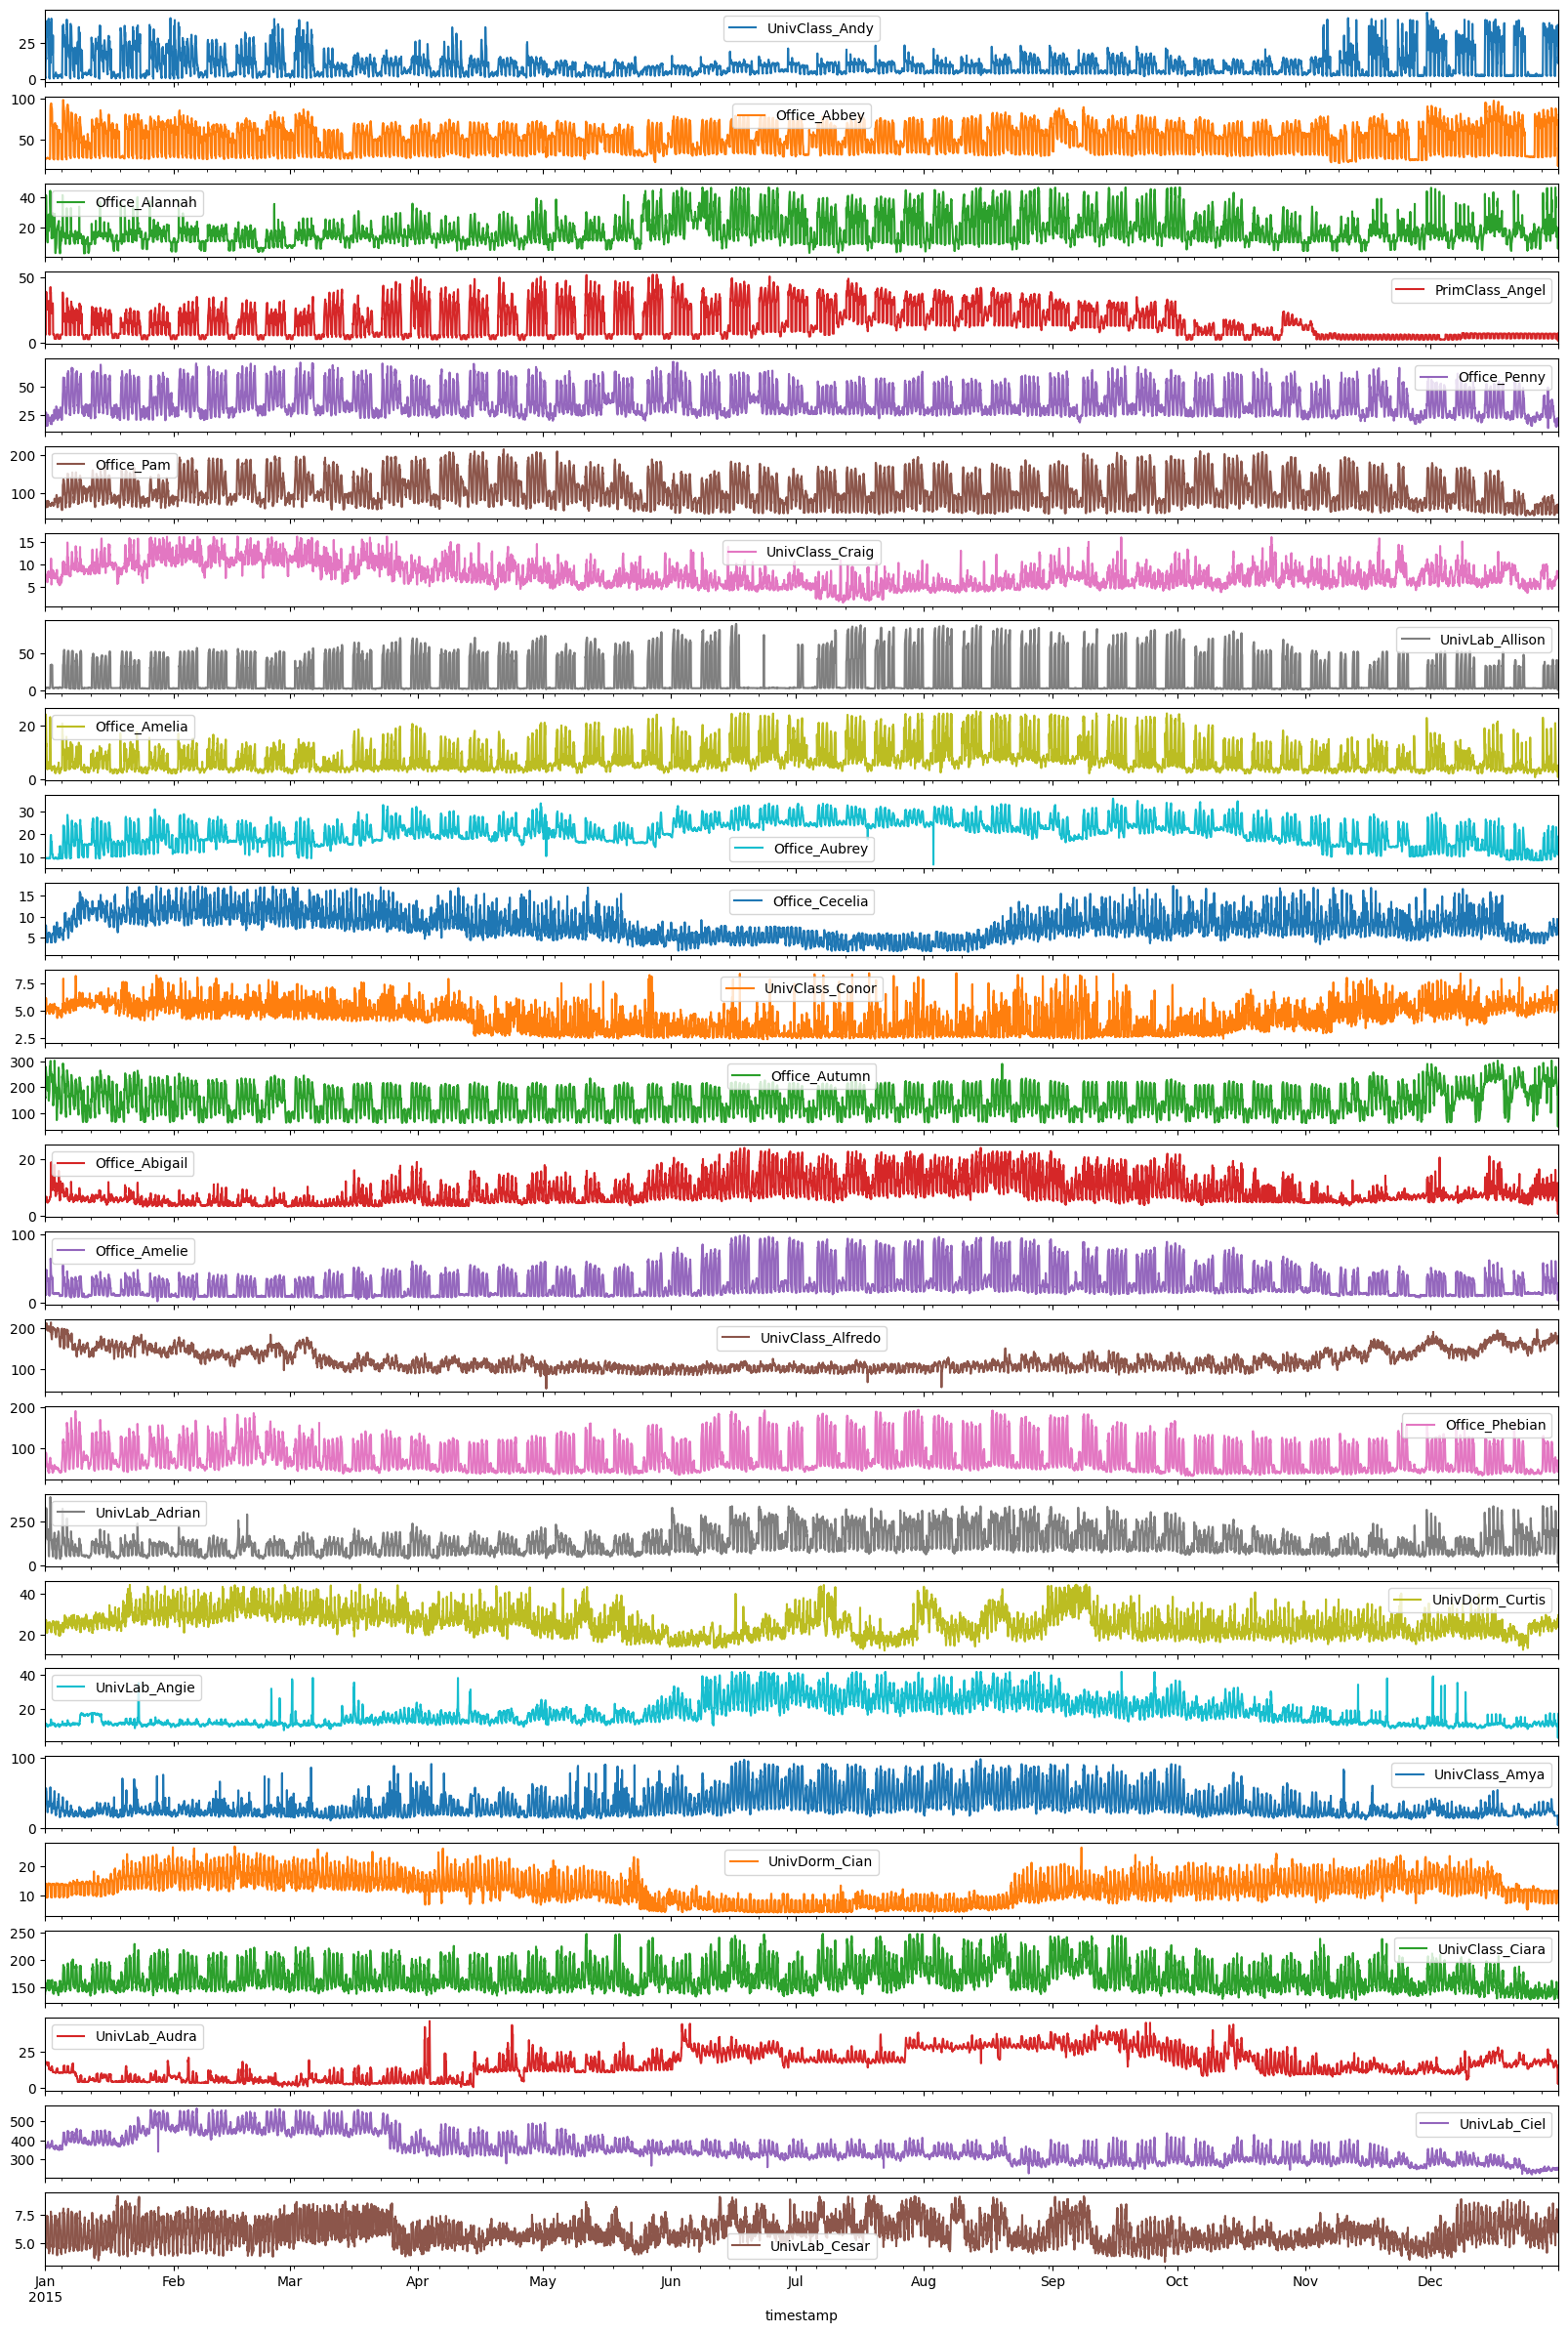

In [33]:
all_data.plot(figsize=(20,30), subplots=True);

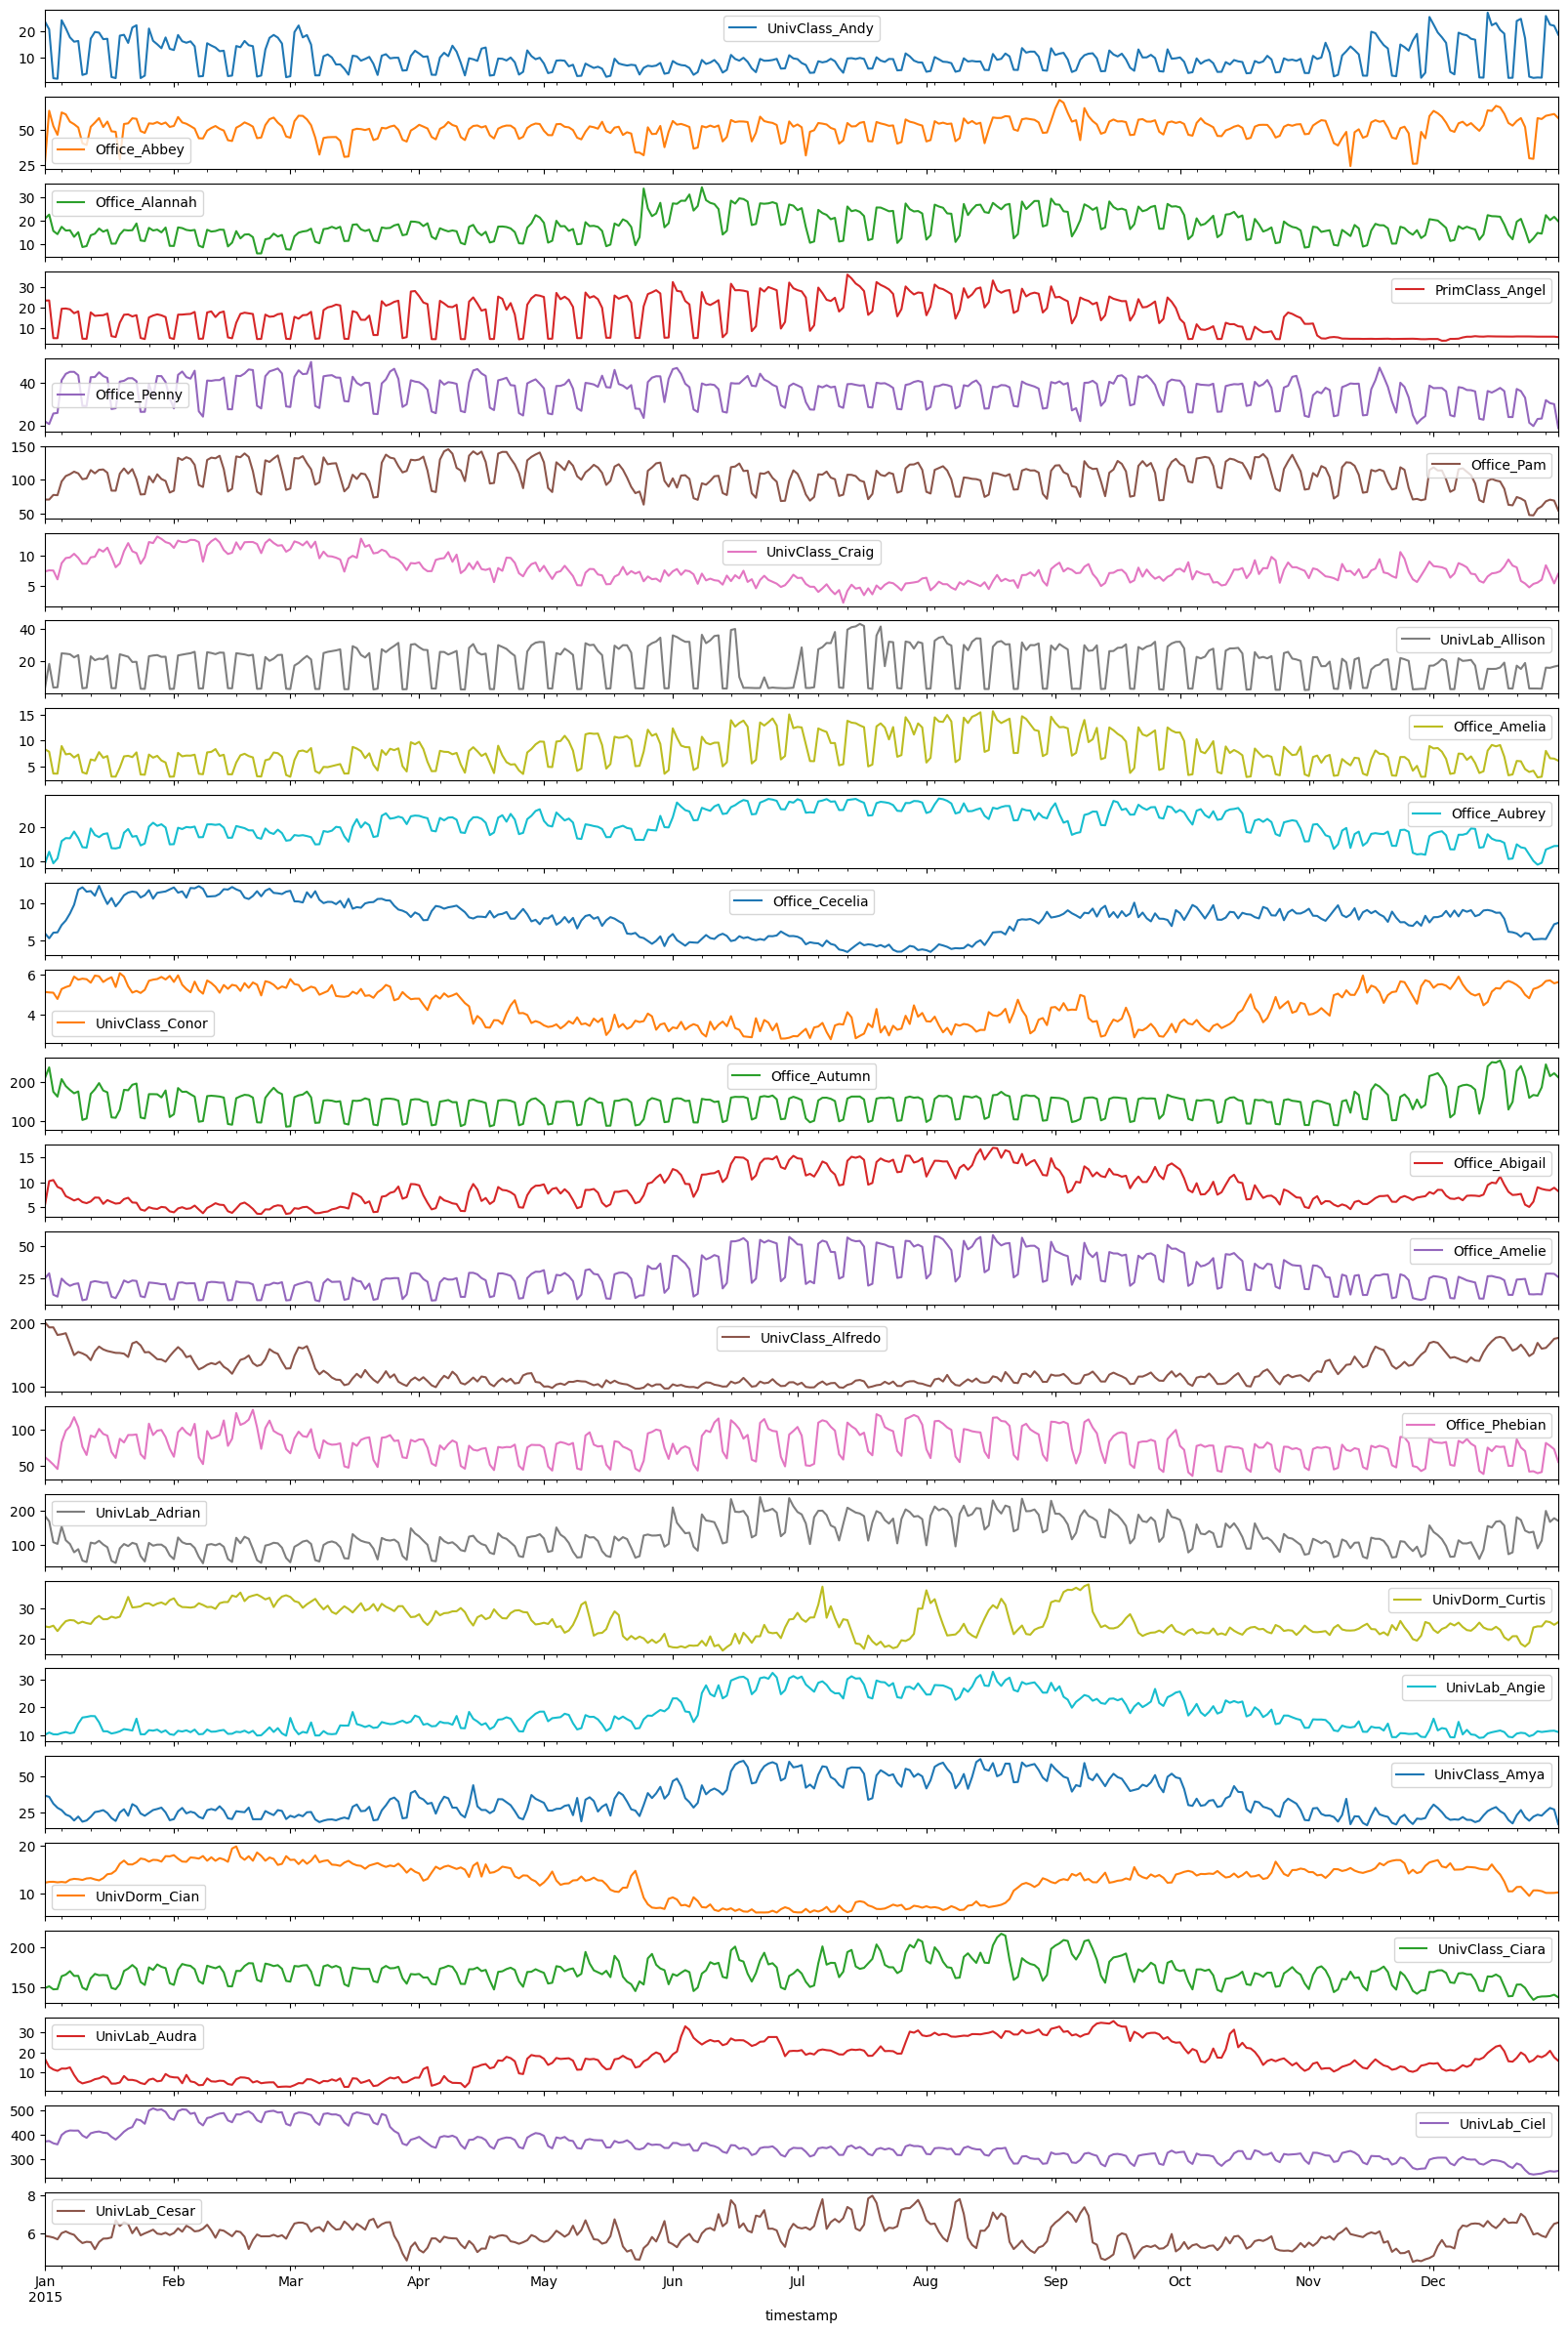

In [34]:
# Downsampling to a lower frequency (Date)
all_data.resample("D").mean().plot(figsize=(20,30), subplots=True);

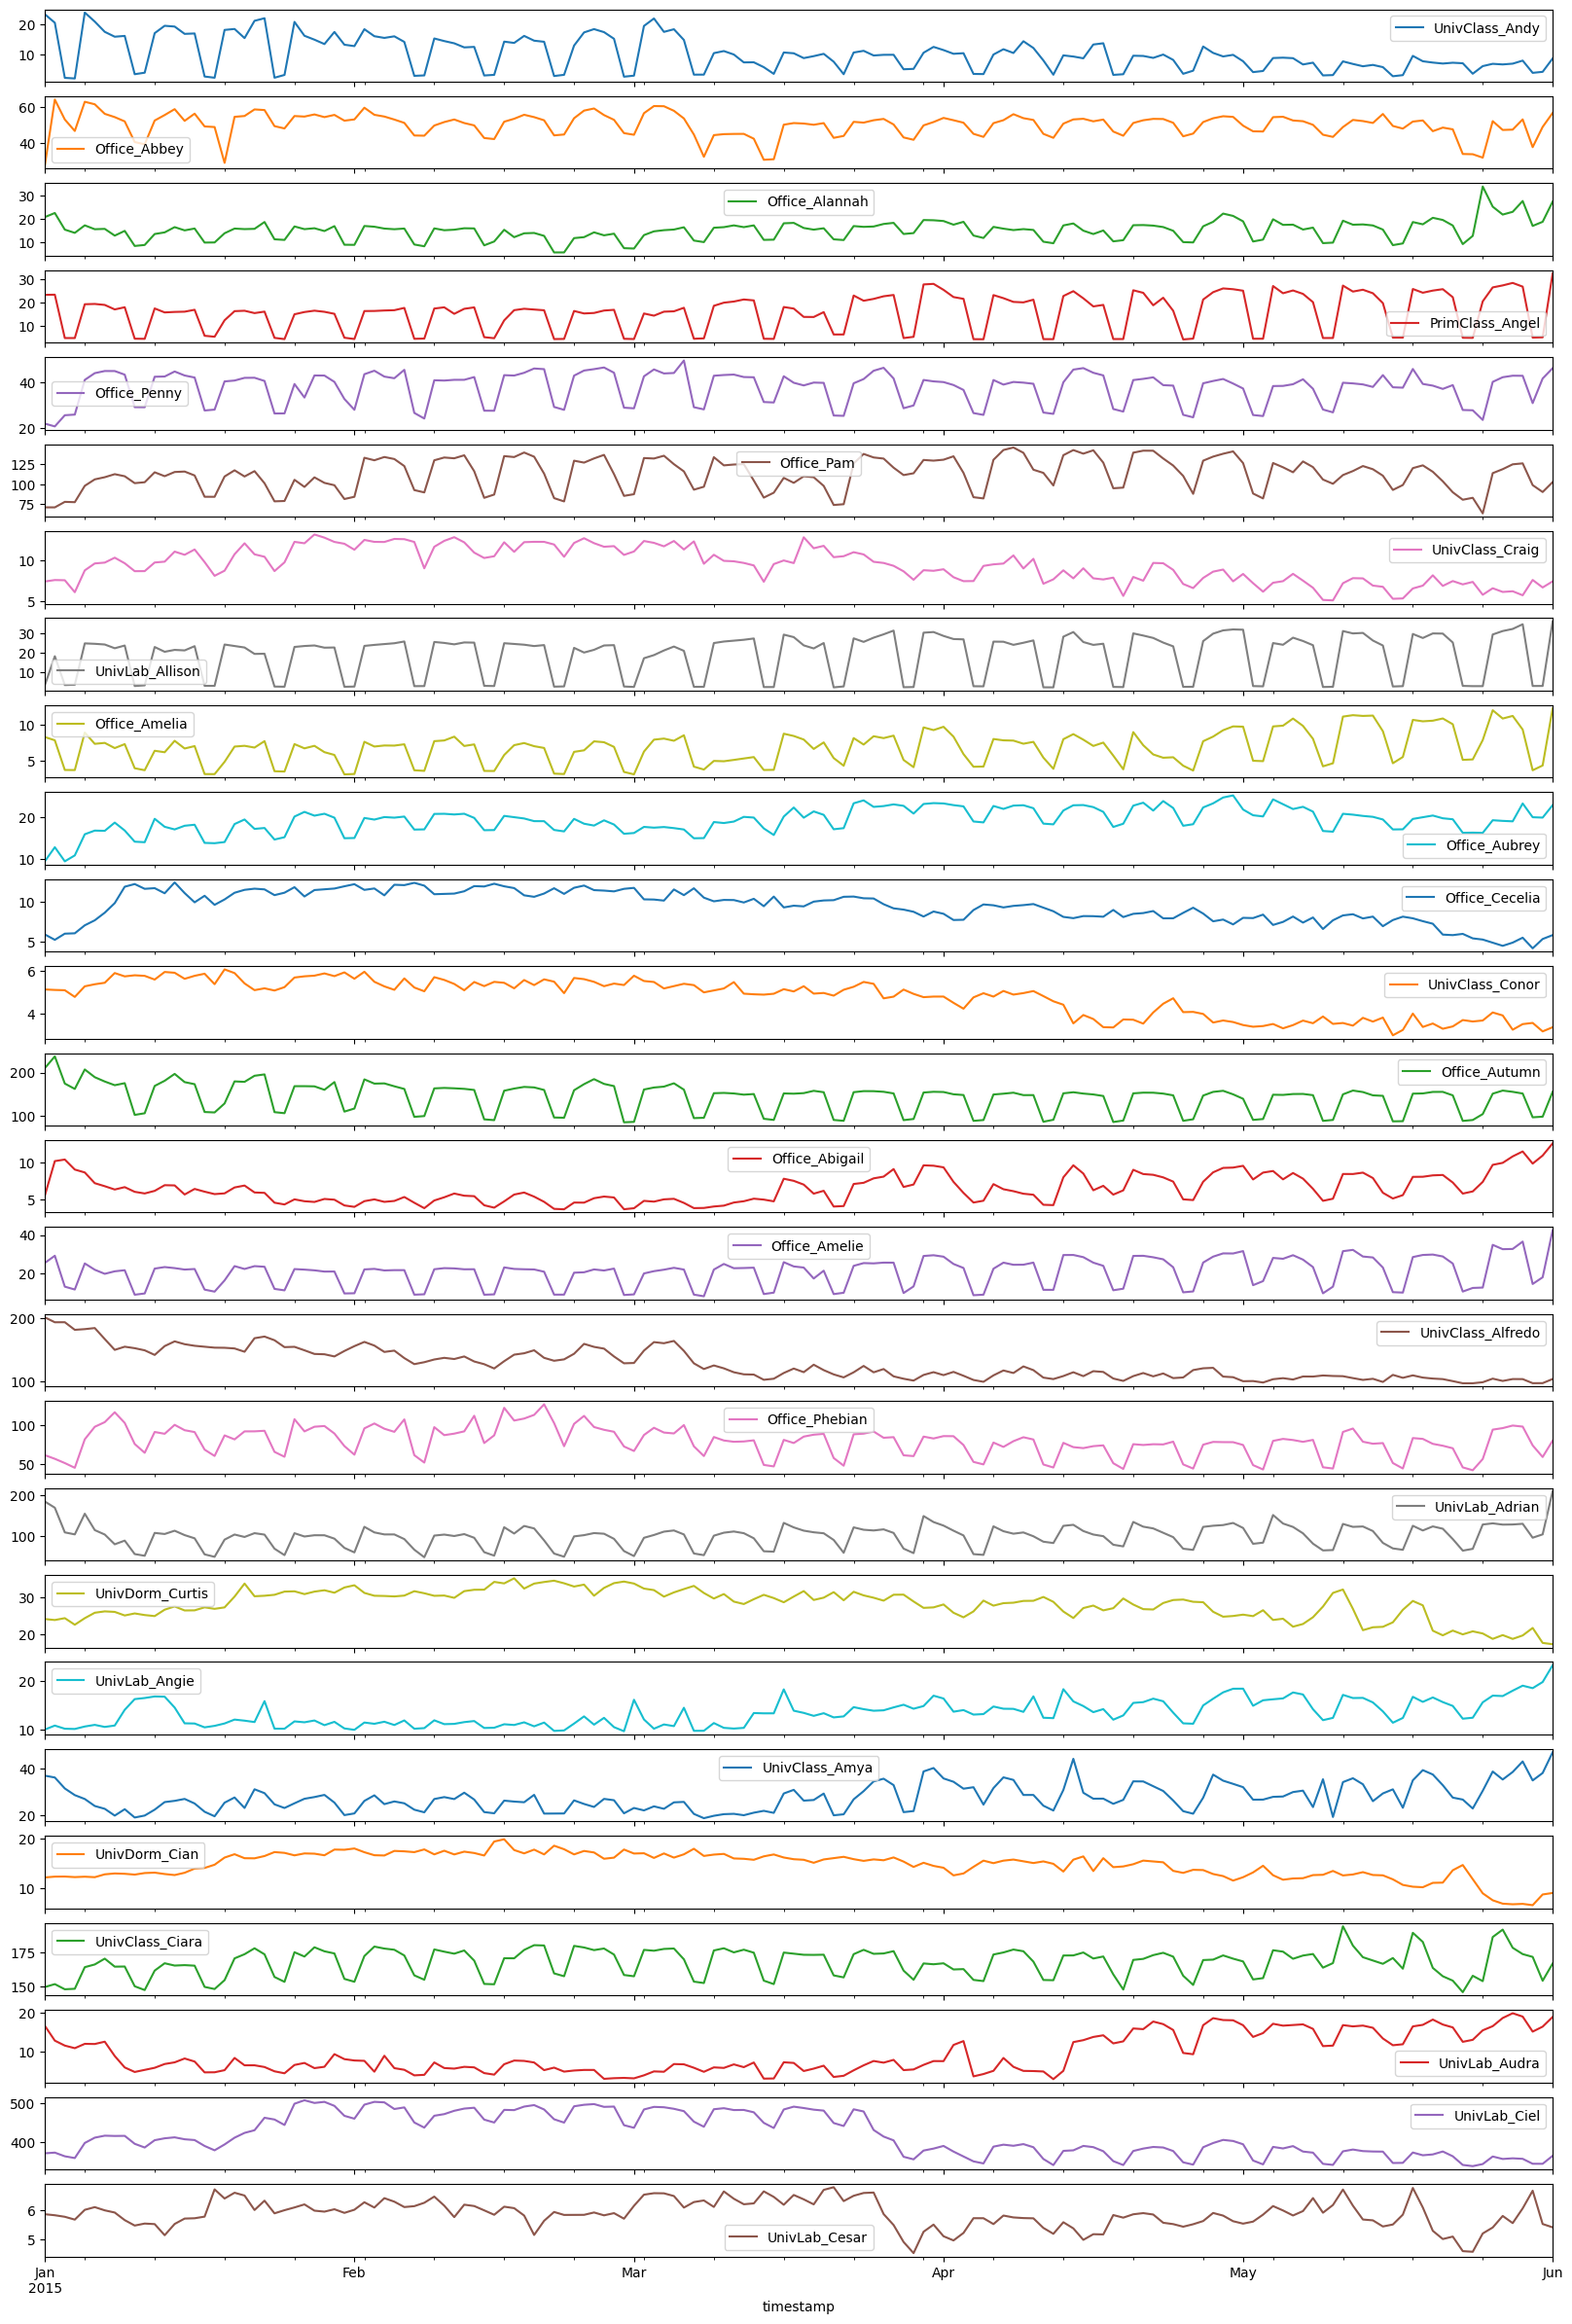

In [35]:
# Resmpling to lower frequency then truncating the data to slice and give data from June 2015 forward:
all_data.resample("D").mean().truncate(after='2015-06-01').plot(figsize=(20,30), subplots=True);

## Filter columns by query where query = 'office'

Looking at the data of buildings from all_data that are *office* buildings by filtering the columns based on name:

In [36]:
all_data.columns[all_data.columns.str.contains("Office")]

Index(['Office_Abbey', 'Office_Alannah', 'Office_Penny', 'Office_Pam',
       'Office_Amelia', 'Office_Aubrey', 'Office_Cecelia', 'Office_Autumn',
       'Office_Abigail', 'Office_Amelie', 'Office_Phebian'],
      dtype='object')

In [37]:
all_data[all_data.columns[all_data.columns.str.contains("Office")]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abbey    8760 non-null   float64
 1   Office_Alannah  8760 non-null   float64
 2   Office_Penny    8759 non-null   float64
 3   Office_Pam      8759 non-null   float64
 4   Office_Amelia   8760 non-null   float64
 5   Office_Aubrey   8760 non-null   float64
 6   Office_Cecelia  8759 non-null   float64
 7   Office_Autumn   8760 non-null   float64
 8   Office_Abigail  8760 non-null   float64
 9   Office_Amelie   8760 non-null   float64
 10  Office_Phebian  8759 non-null   float64
dtypes: float64(11)
memory usage: 821.2 KB


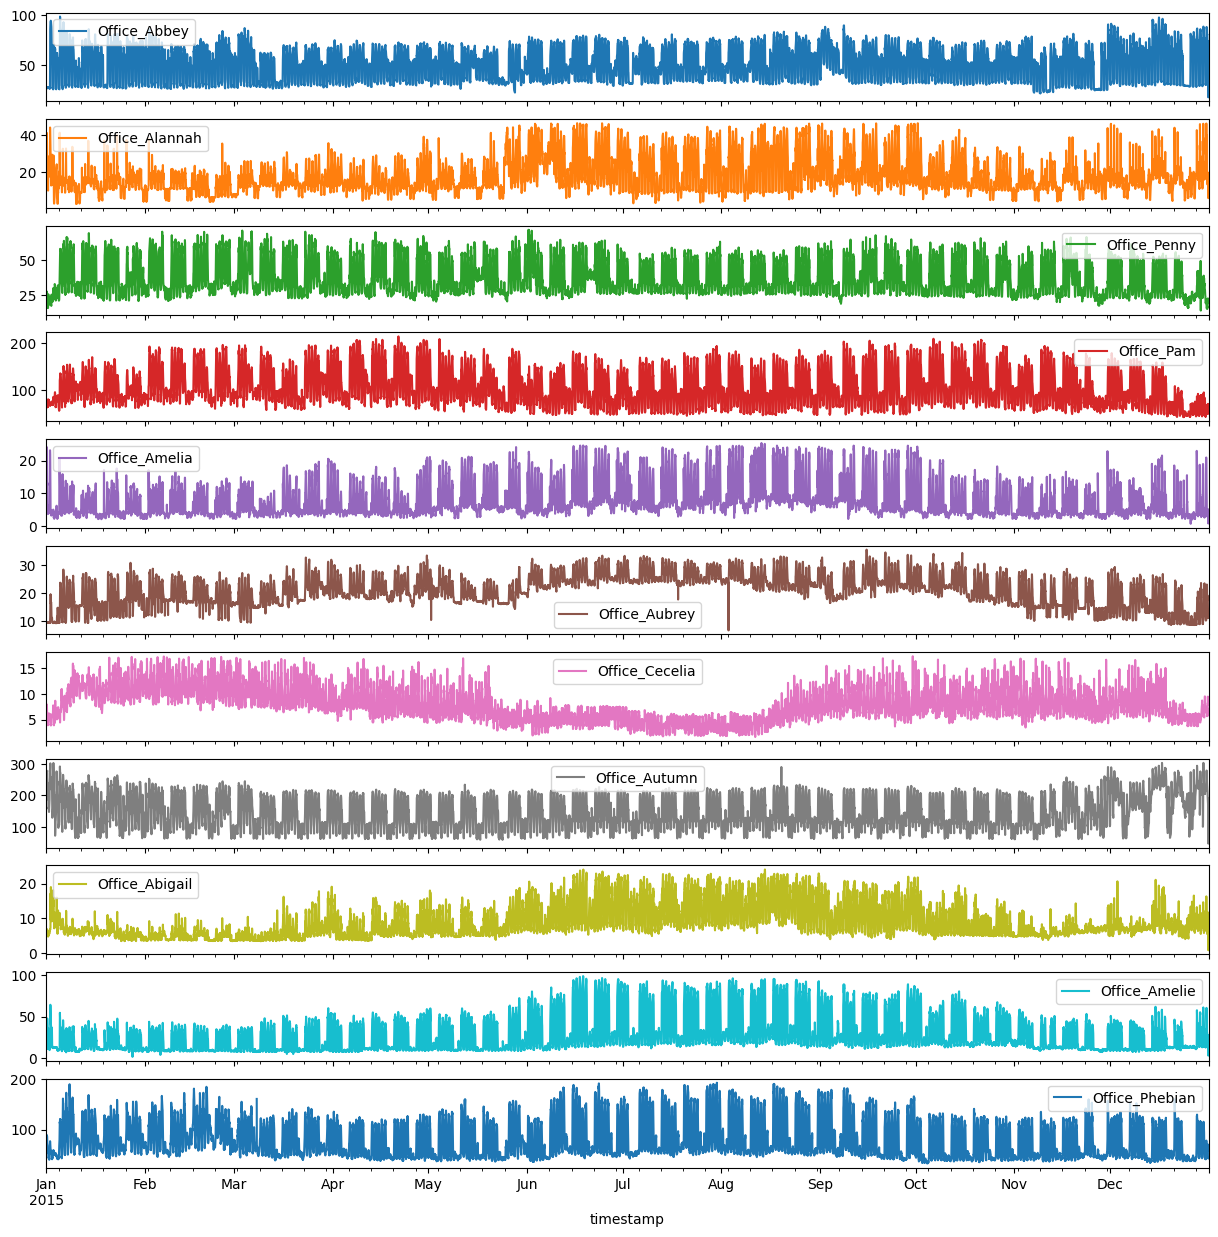

In [38]:
all_data[all_data.columns[all_data.columns.str.contains("Office")]].plot(figsize=(15,15), subplots=True);

# PROJECT B

## Comparison of Energy Data of Buildings through Time Series Analysis
## Normalizing energy consumption of buildings to be able to compare them to each other

Buildings have different properties and uses. We would obviously expect to have different eergy consumption quantities or rates.
For us to come up with a fair strategy to compare the different buildings from our *Building Data Genome Project*, we have to pass the data through a Normalization process.


## Question: How can we compare the energy consumption of buildings that are of different sizes, from different climates, etc.?

Our approach: Same as the for Projeect A above:
We will start by analysing data from one builsing to demonstrate the typical time series analysis process before tacling the main project wheere we use multiple buildings' data.
We will use building called "Office_Abbey" as highilighted:


In [39]:
%matplotlib inline

In [40]:
buildingname = "Office_Abbey" # Assigning "Office_Abbey" to variable, buildingname'

In [41]:
rawdata = pd.read_csv(buildingname+".csv", parse_dates=True, index_col='timestamp')

In [42]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Office_Abbey  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [43]:
rawdata.head() # This displays the energy consumption data of "Office_Abbey"

Office_Abbey
timestamp                        
2015-01-01 00:00:00         27.79
2015-01-01 01:00:00         27.66
2015-01-01 02:00:00         27.13
2015-01-01 03:00:00         27.34
2015-01-01 04:00:00         27.34

<Axes: xlabel='timestamp'>

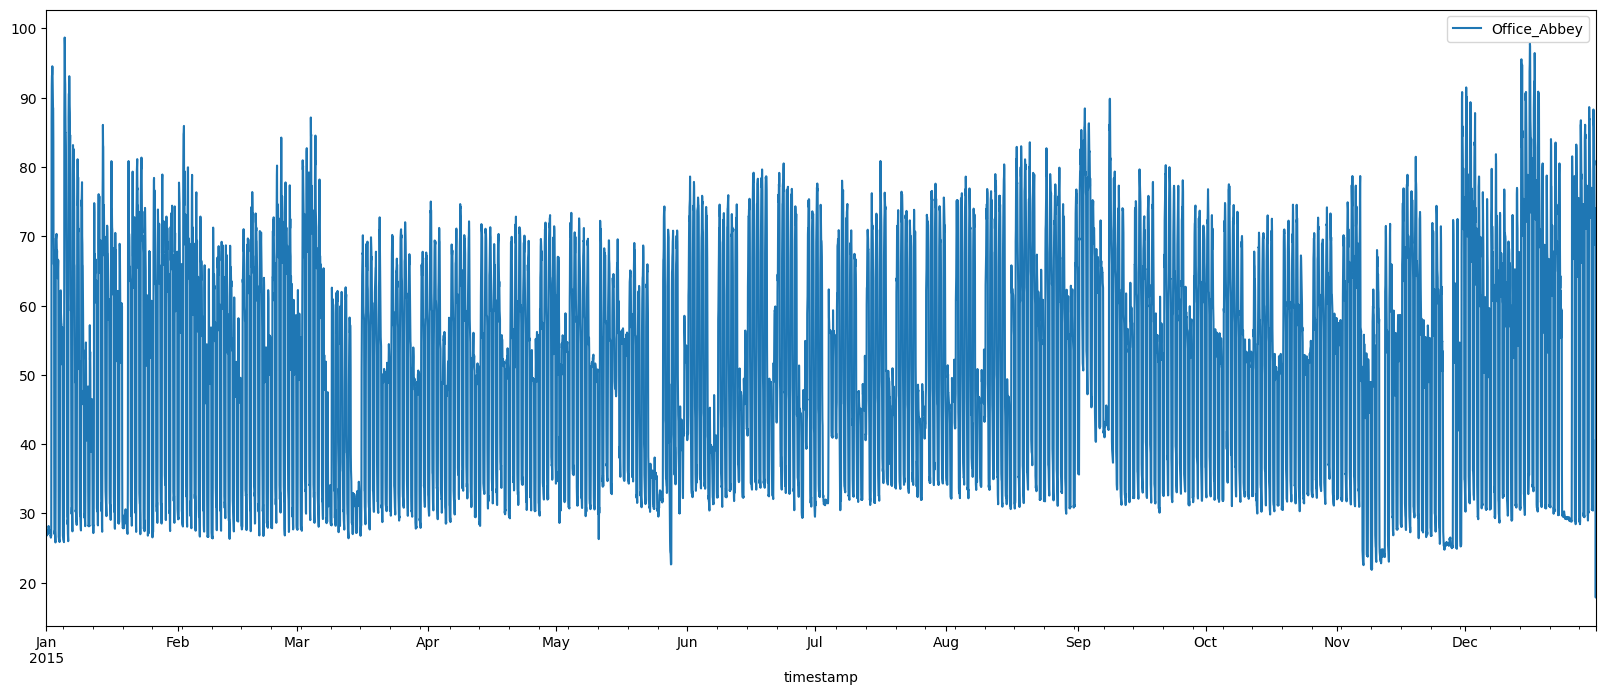

In [44]:
rawdata.plot(figsize=(20,8)) # Plotting its energy consumption data

# Normalization based on floor area

To normalize the data in question, we will divide energy consumption by the floor area to create the Energy Use Intensity (EUI). This metric takes energy and simply divides by the floor area (in ft2 or m2)
As noted in our previous code, we do not have the floor area or any other property of the building "Office_Abbey" in the DataFrame above.
To get these properties, we will read in the larger dataset that has all the data properties of each building. This goes to say that the larger dataset has building (building names) as variable/ rows and their properties in columns.

In [45]:
# Readiing in te larger dataset and calling it to variable 'meta':
meta = pd.read_csv("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/all_buildings_meta_data.csv", index_col="uid")

In [46]:
meta.head() # Viewing the first few rows (which are essentially buildings) from the meta dataset

dataend       datastart  energystarscore  \
uid                                                                    
PrimClass_Everett    31/12/12 23:00  01/01/12 00:00              NaN   
UnivClass_Clifford   31/12/15 23:00  01/01/15 00:00              NaN   
Office_Elizabeth     31/12/12 23:00  01/01/12 00:00              NaN   
Office_Ellie         31/12/12 23:00  01/01/12 00:00              NaN   
PrimClass_Elisabeth  31/12/12 23:00  01/01/12 00:00              NaN   

                    heatingtype             industry mainheatingtype  \
uid                                                                    
PrimClass_Everett           NaN            Education             NaN   
UnivClass_Clifford          NaN            Education             NaN   
Office_Elizabeth            NaN  Commercial Property             NaN   
Office_Ellie                NaN  Commercial Property             NaN   
PrimClass_Elisabeth         NaN            Education             NaN   

                     numberoffloors  occupants            primaryspaceusage  \
uid                                                                           
PrimClass_Everett               NaN        NaN  Primary/Secondary Classroom   
UnivClass_Clifford              NaN        NaN            College Classroom   
Office_Elizabeth                NaN        NaN                       Office   
Office_Ellie                    NaN        NaN                       Office   
PrimClass_Elisabeth             NaN        NaN  Primary/Secondary Classroom   

                    rating      sqft           sqm               subindustry  \
uid                                                                            
PrimClass_Everett      NaN  105530.0   9804.053590  Primary/Secondary School   
UnivClass_Clifford     NaN   56969.0   5292.591007        College/University   
Office_Elizabeth       NaN  294651.0  27373.961850    Commercial Real Estate   
Office_Ellie           NaN  496517.0  46127.918850   Bank/Financial Services   
PrimClass_Elisabeth    NaN  233062.0  21652.158990  Primary/Secondary School   

                                timezone yearbuilt   nickname  \
uid                                                             
PrimClass_Everett       America/New_York       NaN    Everett   
UnivClass_Clifford      America/New_York      1967   Clifford   
Office_Elizabeth     America/Los_Angeles       NaN  Elizabeth   
Office_Ellie         America/Los_Angeles       NaN      Ellie   
PrimClass_Elisabeth     America/New_York       NaN  Elisabeth   

                    primaryspaceuse_abbrev newweatherfilename  
uid                                                            
PrimClass_Everett                PrimClass      weather12.csv  
UnivClass_Clifford               UnivClass       weather2.csv  
Office_Elizabeth                    Office      weather22.csv  
Office_Ellie                        Office      weather28.csv  
PrimClass_Elisabeth              PrimClass      weather23.csv

## Extract meta data from another file
As seen above, the meta data file has various attributes that we can use to normalize the building consumption -- including `sqm` or size of the building.
We only need the properties og "Office_Abbey" from the meta data file. So we will access it by usinf '.loc' function that is used to access attributes of a articular row (in this case, Office_Abbey') from a dataframe.

In [47]:
meta.loc[buildingname]

dataend                       31/12/15 23:00
datastart                     01/01/15 00:00
energystarscore                          NaN
heatingtype                              NaN
industry                           Education
mainheatingtype                          NaN
numberoffloors                           NaN
occupants                                NaN
primaryspaceusage                     Office
rating                                   NaN
sqft                                 74180.0
sqm                               6891.54454
subindustry               College/University
timezone                     America/Phoenix
yearbuilt                               1930
nickname                               Abbey
primaryspaceuse_abbrev                Office
newweatherfilename              weather0.csv
Name: Office_Abbey, dtype: object

In [48]:
# Getting the specific attribute (floor area) of "Office_Abbey" from the metadata:
meta.loc[buildingname]["sqm"]

6891.54454

Now we normalize the energ consumption of "Office_Abbey" using area by using a vector operation and resampling to monthly data.

In [49]:
rawdata.head() # Displaying the 1st few rows of energy consumption data of the building

Office_Abbey
timestamp                        
2015-01-01 00:00:00         27.79
2015-01-01 01:00:00         27.66
2015-01-01 02:00:00         27.13
2015-01-01 03:00:00         27.34
2015-01-01 04:00:00         27.34

In [50]:
rawdata_normalized = rawdata/meta.loc[buildingname]["sqm"] # Normalizing the energgy data by dividing each energy value by the floor area of the building

In [51]:
rawdata_normalized.head()

Office_Abbey
timestamp                        
2015-01-01 00:00:00      0.004032
2015-01-01 01:00:00      0.004014
2015-01-01 02:00:00      0.003937
2015-01-01 03:00:00      0.003967
2015-01-01 04:00:00      0.003967

In [52]:
# resampling the normalized data to Monthly data
rawdata_normalized_monthly = rawdata_normalized.resample("M").sum()

<Axes: title={'center': 'Energy Consumption per Square Meter Floor Area'}, xlabel='timestamp'>

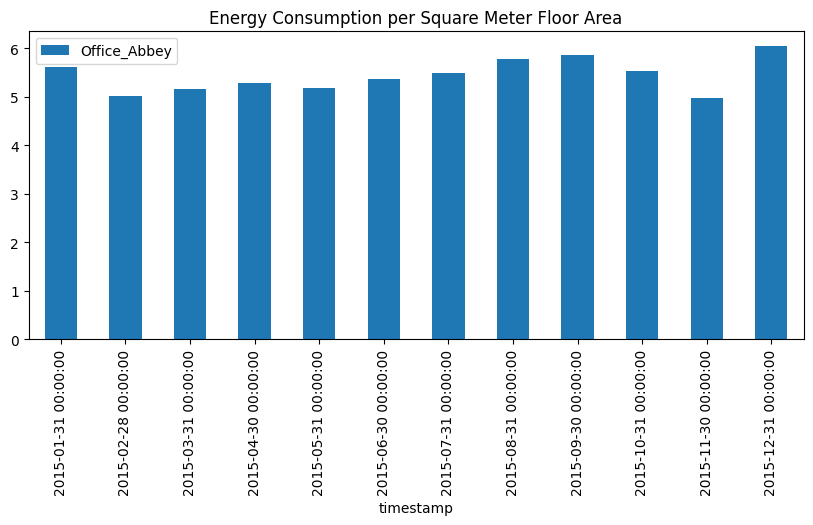

In [53]:
# Displaying a bar graph of the normalized and resampled data to compare energy consumption by month
rawdata_normalized_monthly.plot(kind="bar", figsize=(10,4), title='Energy Consumption per Square Meter Floor Area')

# Performing time-series analysis to investigate Influence og Building Floor Area on multiple buildings by Automation

Normalization is really about the ability to compare a diverse set of buildings

Now we load 6 buildings to extract and normalize the data. Since the normalization process is most useful on a set of buildings, we will load six of the BDG buildings as an example to showcase the comparison.


In [54]:
# We create a list of the buildings that we are analysing into a variable:
buildingnamelist = ["Office_Abbey",
"Office_Pam",
"Office_Penny",
"UnivLab_Allison",
"UnivLab_Audra",
"UnivLab_Ciel"]

In [55]:
# Creating an empty list to capture energy consumption of the building:
annual_data_list = []
annual_data_list_normalized = []

In [56]:
# Creating a function that will loop over the list of builsings created earlier:
for buildingname in buildingnamelist:
    print("Getting data from: "+buildingname)

    rawdata = pd.read_csv(buildingname+".csv", parse_dates=True, index_col='timestamp') # reads each of the building into python
    floor_area = meta.loc[buildingname]["sqm"] # gets the floor area of each builing from the larger dataset

    annual = rawdata.sum() # Gets the total energy consumption value of each buiilding

    normalized_data = rawdata/floor_area # Normalizes the data by dividing the individual energy consumption value of each building by the building floor area
    annual_normalized = normalized_data.sum() # Gets the total energy consumption value of each buiilding after normalization

    annual_data_list_normalized.append(annual_normalized) # Appends the normalized data to the list created in our previous code chunk
    annual_data_list.append(annual) # Appends the unnormalized data to the list created in our previous code chunk

Getting data from: Office_Abbey
Getting data from: Office_Pam
Getting data from: Office_Penny
Getting data from: UnivLab_Allison
Getting data from: UnivLab_Audra
Getting data from: UnivLab_Ciel


In [57]:
annual_data_list

[Office_Abbey    450004.6775
 dtype: float64,
 Office_Pam    923984.86751
 dtype: float64,
 Office_Penny    316720.419338
 dtype: float64,
 UnivLab_Allison    161430.8575
 dtype: float64,
 UnivLab_Audra    146686.6625
 dtype: float64,
 UnivLab_Ciel    3.122984e+06
 dtype: float64]

In [58]:
annual_data_list_normalized

[Office_Abbey    65.298087
 dtype: float64,
 Office_Pam    95.022257
 dtype: float64,
 Office_Penny    90.947091
 dtype: float64,
 UnivLab_Allison    370.575397
 dtype: float64,
 UnivLab_Audra    344.517297
 dtype: float64,
 UnivLab_Ciel    143.740305
 dtype: float64]

In [59]:
# Concatenating the data:
totaldata = pd.concat(annual_data_list)
totaldata_normalized = pd.concat(annual_data_list_normalized)

In [60]:
totaldata

Office_Abbey       4.500047e+05
Office_Pam         9.239849e+05
Office_Penny       3.167204e+05
UnivLab_Allison    1.614309e+05
UnivLab_Audra      1.466867e+05
UnivLab_Ciel       3.122984e+06
dtype: float64

In [61]:
totaldata_normalized

Office_Abbey        65.298087
Office_Pam          95.022257
Office_Penny        90.947091
UnivLab_Allison    370.575397
UnivLab_Audra      344.517297
UnivLab_Ciel       143.740305
dtype: float64

## Unnormalized energy consumption

Next, we will create a bar graph to viw comparison of total annual energy consumption og the 6 buildins:
As seen from the annual totals of energy consumption, the Lab named *Ciel* uses a lot of energy as compared to the other buildings, without normalization:

<Axes: >

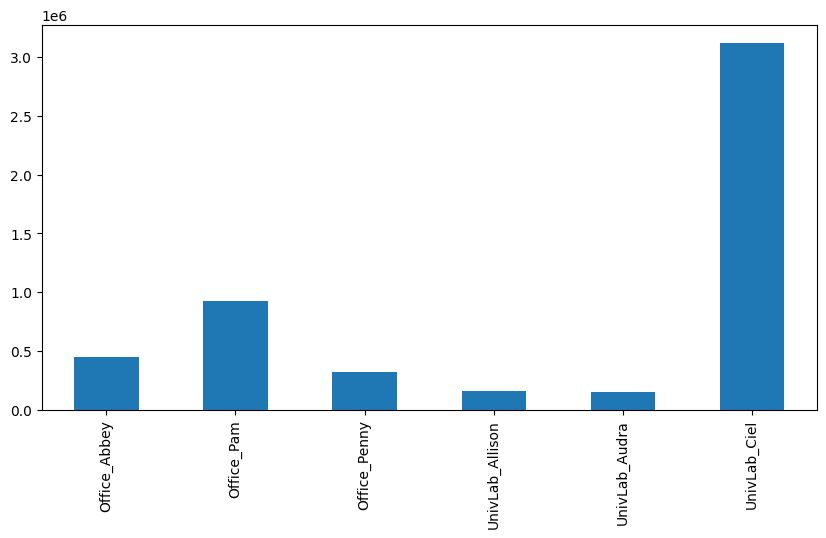

In [62]:
totaldata.plot(kind='bar',figsize=(10,5))

## Normalized Energy Consumption

However, when normalized using floor area, *Ciel* is not the highest consumer; it is in fact Allison.

<Axes: >

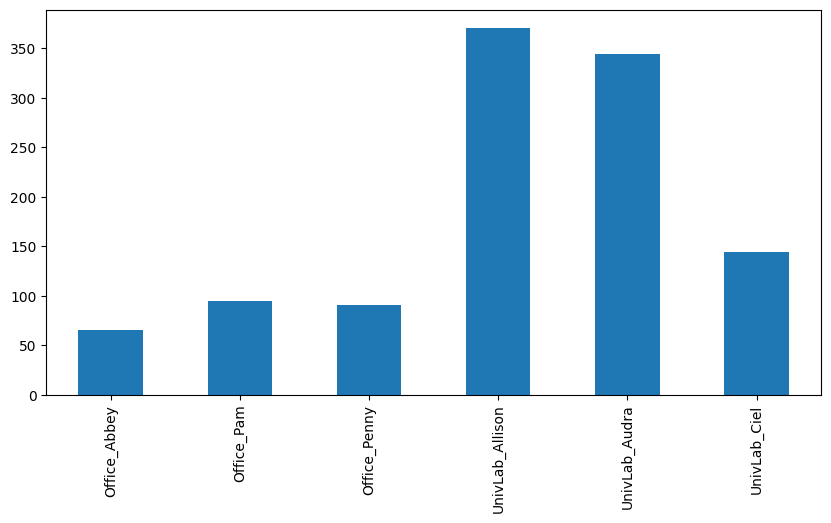

In [63]:
totaldata_normalized.plot(kind='bar',figsize=(10,5))

# Weather Influence on Energy Consumption of a Building

##**Analysis 1:** How does weather influence building energy consumption of Building named UnivClass_Ciara?

We will take the same approach as in previous analysis where we will have a control analyiss using data from one building then esalate higher using multiple sets of buildings.
In that case therefore, we will use "UniveClass_Ciare.csv" building for the first task:

In [64]:
rawdata = pd.read_csv("UnivClass_Ciara.csv", parse_dates=True, index_col='timestamp')
rawdata.head()

UnivClass_Ciara
timestamp                           
2015-01-01 00:00:00       136.824997
2015-01-01 01:00:00       144.025002
2015-01-01 02:00:00       144.875000
2015-01-01 03:00:00       142.375000
2015-01-01 04:00:00       148.199997

In [65]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivClass_Ciara  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


<Axes: xlabel='timestamp'>

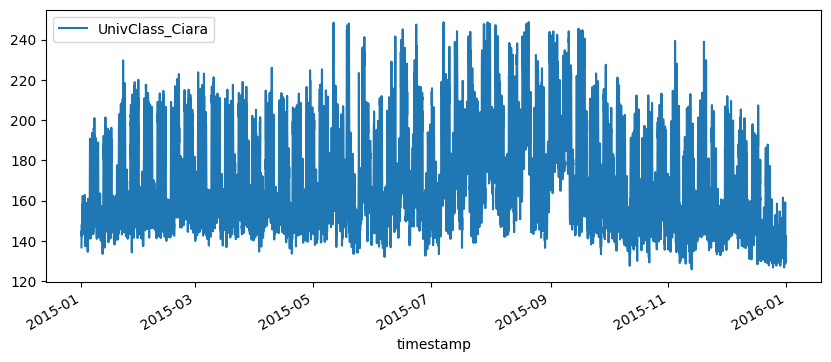

In [66]:
rawdata.plot(figsize=(10,4))

# Load the weather data file - Cleaning Data and Dealing with Missing Data

In this case, we will use weather data files to supplement the analysis and converge the two different datasets i.e the energy consumption data of the building and its coresponding weather data dataset.

First we will have to find the right weather file (can be found in the `meta.csv` file manually). For this building, the weather file is `weather2.csv`

In [67]:
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/weather_data/")
weather_data = pd.read_csv("weather2.csv", index_col='timestamp', parse_dates=True)

In [68]:
weather_data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


Conditions              DateUTC<br />  Dew PointC Events  \
timestamp                                                                      
2015-01-01 00:56:00   Overcast  2015-01-01 05:56:00<br />       -15.0    NaN   
2015-01-01 01:56:00   Overcast  2015-01-01 06:56:00<br />       -14.4    NaN   
2015-01-01 02:56:00   Overcast  2015-01-01 07:56:00<br />       -14.4    NaN   
2015-01-01 03:56:00   Overcast  2015-01-01 08:56:00<br />       -14.4    NaN   
2015-01-01 04:56:00   Overcast  2015-01-01 09:56:00<br />       -14.4    NaN   

                    Gust SpeedKm/h  Humidity  Precipitationmm  \
timestamp                                                       
2015-01-01 00:56:00              -      54.0              NaN   
2015-01-01 01:56:00              -      55.0              NaN   
2015-01-01 02:56:00              -      55.0              NaN   
2015-01-01 03:56:00              -      55.0              NaN   
2015-01-01 04:56:00              -      55.0              NaN   

                     Sea Level PressurehPa  TemperatureC TimeEDT   TimeEST  \
timestamp                                                                    
2015-01-01 00:56:00                 1017.4          -7.2     NaN  12:56 AM   
2015-01-01 01:56:00                 1017.2          -6.6     NaN   1:56 AM   
2015-01-01 02:56:00                 1016.9          -6.6     NaN   2:56 AM   
2015-01-01 03:56:00                 1017.2          -6.6     NaN   3:56 AM   
2015-01-01 04:56:00                 1017.2          -6.6     NaN   4:56 AM   

                     VisibilityKm Wind Direction Wind SpeedKm/h  \
timestamp                                                         
2015-01-01 00:56:00          16.1             SW           18.5   
2015-01-01 01:56:00          16.1            WSW           14.8   
2015-01-01 02:56:00          16.1             SW           14.8   
2015-01-01 03:56:00          16.1             SW           18.5   
2015-01-01 04:56:00          16.1            SSW           14.8   

                     WindDirDegrees          timestamp.1  
timestamp                                                 
2015-01-01 00:56:00             230  2015-01-01 00:56:00  
2015-01-01 01:56:00             240  2015-01-01 01:56:00  
2015-01-01 02:56:00             220  2015-01-01 02:56:00  
2015-01-01 03:56:00             220  2015-01-01 03:56:00  
2015-01-01 04:56:00             210  2015-01-01 04:56:00

In [69]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10914 entries, 2015-01-01 00:56:00 to 2015-12-31 21:56:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Conditions             10914 non-null  object 
 1   DateUTC<br />          10914 non-null  object 
 2   Dew PointC             10914 non-null  float64
 3   Events                 2555 non-null   object 
 4   Gust SpeedKm/h         10914 non-null  object 
 5   Humidity               10878 non-null  float64
 6   Precipitationmm        2945 non-null   float64
 7   Sea Level PressurehPa  10914 non-null  float64
 8   TemperatureC           10914 non-null  float64
 9   TimeEDT                7104 non-null   object 
 10  TimeEST                3810 non-null   object 
 11  VisibilityKm           10914 non-null  float64
 12  Wind Direction         10914 non-null  object 
 13  Wind SpeedKm/h         10914 non-null  object 
 14  WindDirDegrees     

### What is the effect of Temperature of a Building on its Energy consumption?
From the dataset, weather_data, we will look at the Temperature attribute since it is one of the factors of weather we are interested in.

<Axes: xlabel='timestamp'>

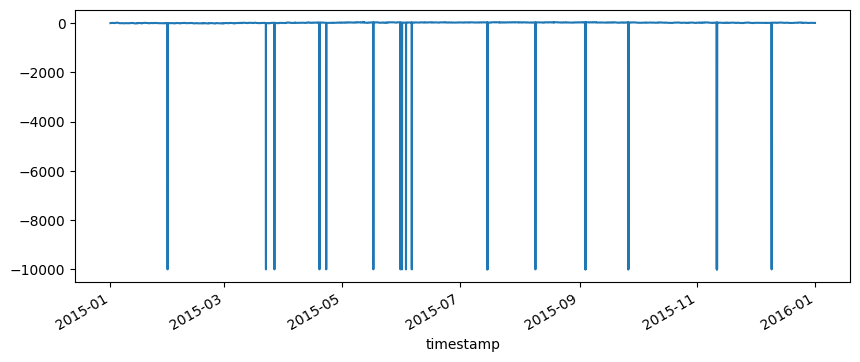

In [70]:
# Plotting temperature data against time:
weather_data["TemperatureC"].plot(figsize=(10,4))

## Finding and removing outliers

From the above plot, it is quite evident that there are quite a few readings in this data set that are very unprobable -- temperature below 10,000 Deg C is physically impossible.

This is a common scenario with IoT devices and we can filter those outlier and fill the gaps

In [71]:
# Resample the data to Hourly:
weather_hourly = weather_data.select_dtypes(include=['number']).resample("H").mean()

In [72]:
weather_hourly

Dew PointC  Humidity  Precipitationmm  \
timestamp                                                    
2015-01-01 00:00:00       -15.0      54.0              NaN   
2015-01-01 01:00:00       -14.4      55.0              NaN   
2015-01-01 02:00:00       -14.4      55.0              NaN   
2015-01-01 03:00:00       -14.4      55.0              NaN   
2015-01-01 04:00:00       -14.4      55.0              NaN   
...                         ...       ...              ...   
2015-12-31 17:00:00        -1.0     100.0              NaN   
2015-12-31 18:00:00        -2.0      93.0              NaN   
2015-12-31 19:00:00        -1.0     100.0              NaN   
2015-12-31 20:00:00        -1.0     100.0              NaN   
2015-12-31 21:00:00        -2.0      93.0              NaN   

                     Sea Level PressurehPa  TemperatureC  VisibilityKm  \
timestamp                                                                
2015-01-01 00:00:00                 1017.4          -7.2          16.1   
2015-01-01 01:00:00                 1017.2          -6.6          16.1   
2015-01-01 02:00:00                 1016.9          -6.6          16.1   
2015-01-01 03:00:00                 1017.2          -6.6          16.1   
2015-01-01 04:00:00                 1017.2          -6.6          16.1   
...                                    ...           ...           ...   
2015-12-31 17:00:00                 1019.2          -1.0          16.1   
2015-12-31 18:00:00                 1019.2          -1.0           8.0   
2015-12-31 19:00:00                 1019.5          -1.0           6.4   
2015-12-31 20:00:00                 1019.2          -1.0           6.4   
2015-12-31 21:00:00                 1018.8          -1.0           6.4   

                     WindDirDegrees  
timestamp                            
2015-01-01 00:00:00           230.0  
2015-01-01 01:00:00           240.0  
2015-01-01 02:00:00           220.0  
2015-01-01 03:00:00           220.0  
2015-01-01 04:00:00           210.0  
...                             ...  
2015-12-31 17:00:00           330.0  
2015-12-31 18:00:00           330.0  
2015-12-31 19:00:00           330.0  
2015-12-31 20:00:00           330.0  
2015-12-31 21:00:00           340.0  

[8758 rows x 7 columns]

To remove outliers max temperature of a typical human environment is ideally up to minimum of -40 degrees celsius. Anything below this is an outlier.

In [73]:
weather_hourly_nooutlier = weather_hourly[weather_hourly > -40]

In [74]:
weather_hourly_nooutlier

Dew PointC  Humidity  Precipitationmm  \
timestamp                                                    
2015-01-01 00:00:00       -15.0      54.0              NaN   
2015-01-01 01:00:00       -14.4      55.0              NaN   
2015-01-01 02:00:00       -14.4      55.0              NaN   
2015-01-01 03:00:00       -14.4      55.0              NaN   
2015-01-01 04:00:00       -14.4      55.0              NaN   
...                         ...       ...              ...   
2015-12-31 17:00:00        -1.0     100.0              NaN   
2015-12-31 18:00:00        -2.0      93.0              NaN   
2015-12-31 19:00:00        -1.0     100.0              NaN   
2015-12-31 20:00:00        -1.0     100.0              NaN   
2015-12-31 21:00:00        -2.0      93.0              NaN   

                     Sea Level PressurehPa  TemperatureC  VisibilityKm  \
timestamp                                                                
2015-01-01 00:00:00                 1017.4          -7.2          16.1   
2015-01-01 01:00:00                 1017.2          -6.6          16.1   
2015-01-01 02:00:00                 1016.9          -6.6          16.1   
2015-01-01 03:00:00                 1017.2          -6.6          16.1   
2015-01-01 04:00:00                 1017.2          -6.6          16.1   
...                                    ...           ...           ...   
2015-12-31 17:00:00                 1019.2          -1.0          16.1   
2015-12-31 18:00:00                 1019.2          -1.0           8.0   
2015-12-31 19:00:00                 1019.5          -1.0           6.4   
2015-12-31 20:00:00                 1019.2          -1.0           6.4   
2015-12-31 21:00:00                 1018.8          -1.0           6.4   

                     WindDirDegrees  
timestamp                            
2015-01-01 00:00:00           230.0  
2015-01-01 01:00:00           240.0  
2015-01-01 02:00:00           220.0  
2015-01-01 03:00:00           220.0  
2015-01-01 04:00:00           210.0  
...                             ...  
2015-12-31 17:00:00           330.0  
2015-12-31 18:00:00           330.0  
2015-12-31 19:00:00           330.0  
2015-12-31 20:00:00           330.0  
2015-12-31 21:00:00           340.0  

[8758 rows x 7 columns]

In [75]:
weather_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dew PointC             8567 non-null   float64
 1   Humidity               8564 non-null   float64
 2   Precipitationmm        1881 non-null   float64
 3   Sea Level PressurehPa  8567 non-null   float64
 4   TemperatureC           8567 non-null   float64
 5   VisibilityKm           8567 non-null   float64
 6   WindDirDegrees         8567 non-null   float64
dtypes: float64(7)
memory usage: 547.4 KB


In [76]:
weather_hourly_nooutlier.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dew PointC             8543 non-null   float64
 1   Humidity               8564 non-null   float64
 2   Precipitationmm        1881 non-null   float64
 3   Sea Level PressurehPa  8544 non-null   float64
 4   TemperatureC           8544 non-null   float64
 5   VisibilityKm           8542 non-null   float64
 6   WindDirDegrees         8567 non-null   float64
dtypes: float64(7)
memory usage: 547.4 KB


<Axes: xlabel='timestamp'>

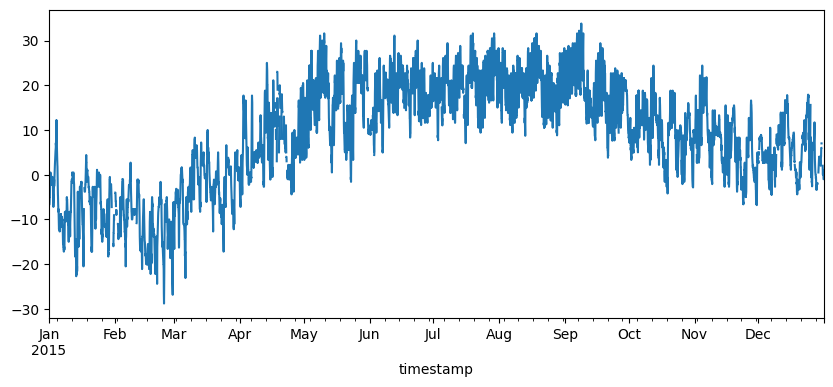

In [77]:
# Plotting for the cleaned data:
weather_hourly_nooutlier["TemperatureC"].plot(figsize=(10,4))

## Filling gaps in data

We can fill the gap left by filtering the outliers by using the `.fillna()` function

In [78]:
weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')

<ipython-input-78-113750447e8b>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')


In [79]:
weather_hourly_nooutlier_nogaps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dew PointC             8758 non-null   float64
 1   Humidity               8758 non-null   float64
 2   Precipitationmm        8731 non-null   float64
 3   Sea Level PressurehPa  8758 non-null   float64
 4   TemperatureC           8758 non-null   float64
 5   VisibilityKm           8758 non-null   float64
 6   WindDirDegrees         8758 non-null   float64
dtypes: float64(7)
memory usage: 547.4 KB


# Merge Temperature and Electricity Data - Combining Data Sets

Once again, we need to converge two data sets -- this time we will use both the `.concat()` and the `.merge()` function to show the differences

In [80]:
weather_hourly_nooutlier_nogaps['TemperatureC'].head()

timestamp
2015-01-01 00:00:00   -7.2
2015-01-01 01:00:00   -6.6
2015-01-01 02:00:00   -6.6
2015-01-01 03:00:00   -6.6
2015-01-01 04:00:00   -6.6
Freq: H, Name: TemperatureC, dtype: float64

In [81]:
# Removing duplicates from the data:
rawdata = rawdata[~rawdata.index.duplicated(keep='first')]

In [82]:
rawdata['UnivClass_Ciara'].head()

timestamp
2015-01-01 00:00:00    136.824997
2015-01-01 01:00:00    144.025002
2015-01-01 02:00:00    144.875000
2015-01-01 03:00:00    142.375000
2015-01-01 04:00:00    148.199997
Name: UnivClass_Ciara, dtype: float64

## Using `.concat()` to combine data sets
After the cleaning operations performed on weather data above, we shall combine the energy consumption data of the building with its temperature data from the cleaned weather data

In [83]:
comparison = pd.concat([weather_hourly_nooutlier_nogaps['TemperatureC'], rawdata['UnivClass_Ciara']], axis=1)

In [84]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     8758 non-null   float64
 1   UnivClass_Ciara  8759 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [85]:
comparison.head()

TemperatureC  UnivClass_Ciara
timestamp                                         
2015-01-01 00:00:00          -7.2       136.824997
2015-01-01 01:00:00          -6.6       144.025002
2015-01-01 02:00:00          -6.6       144.875000
2015-01-01 03:00:00          -6.6       142.375000
2015-01-01 04:00:00          -6.6       148.199997

## We could also use the `.merge()` function

the `.merge()` function is useful in converging data sets that don't fit perfectly together. Merge has several additional attributes that indicate which columns will be merged upon and **how** the merge will occur.

I suggets visiting the following link to learn more on the '.merge' function:
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [86]:
comparison_merged = pd.merge(weather_hourly_nooutlier_nogaps['TemperatureC'], rawdata['UnivClass_Ciara'], left_index=True, right_index=True, how='outer')

In [87]:
comparison_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     8758 non-null   float64
 1   UnivClass_Ciara  8759 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [88]:
comparison_merged

TemperatureC  UnivClass_Ciara
timestamp                                         
2015-01-01 00:00:00          -7.2       136.824997
2015-01-01 01:00:00          -6.6       144.025002
2015-01-01 02:00:00          -6.6       144.875000
2015-01-01 03:00:00          -6.6       142.375000
2015-01-01 04:00:00          -6.6       148.199997
...                           ...              ...
2015-12-31 19:00:00          -1.0       137.749996
2015-12-31 20:00:00          -1.0       141.424999
2015-12-31 21:00:00          -1.0       135.174995
2015-12-31 22:00:00           NaN       130.424999
2015-12-31 23:00:00           NaN       129.325001

[8760 rows x 2 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

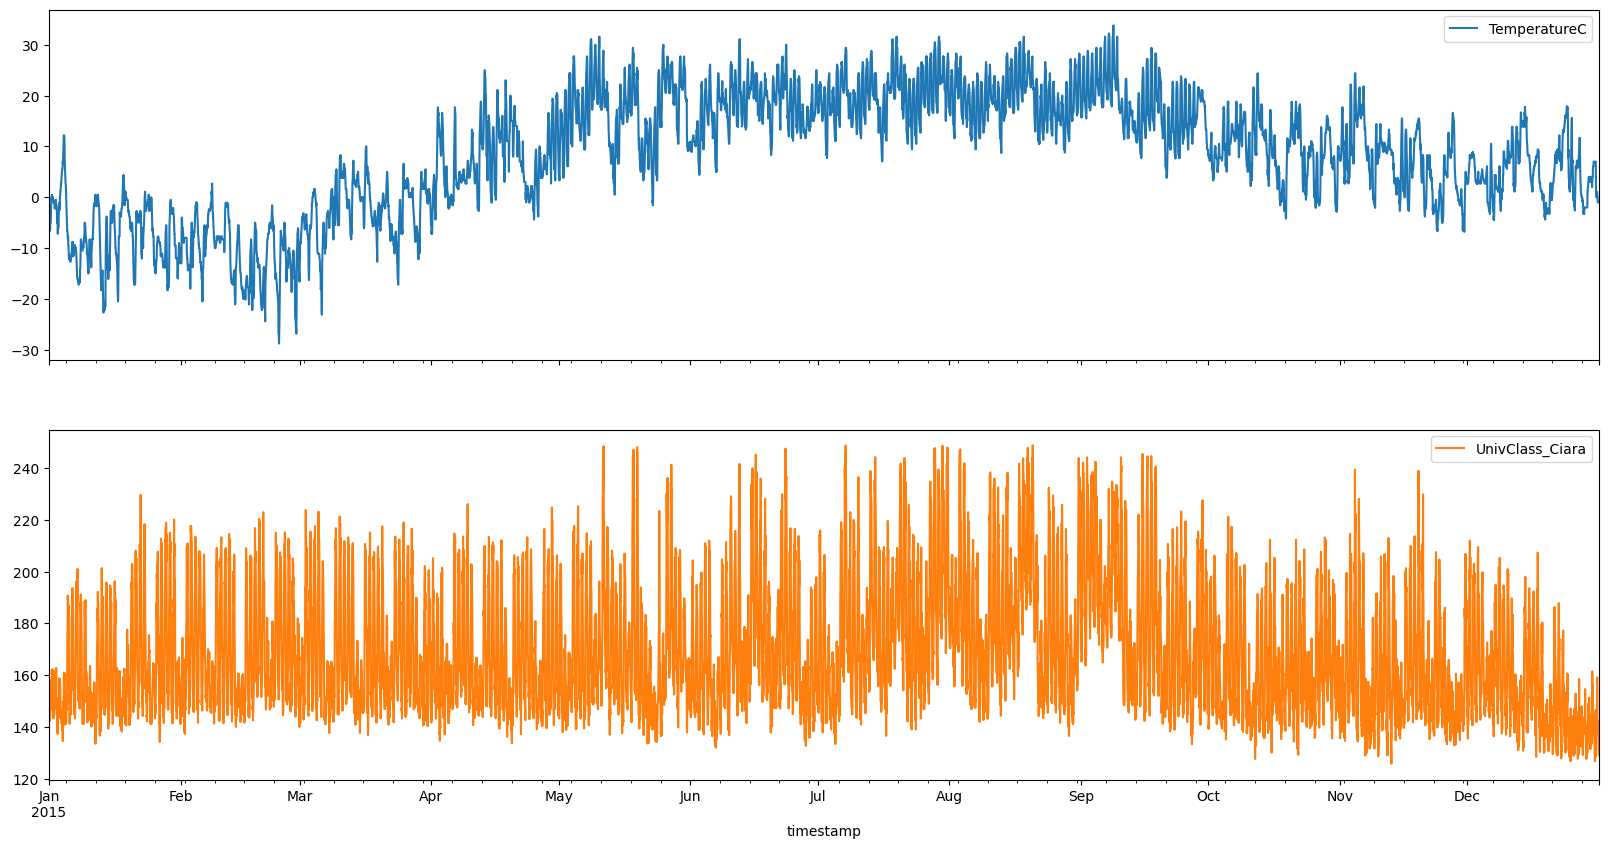

In [89]:
# Creating a line lot to visualize the possible impact of Temperature on Energy consumption at givne time period:
comparison.plot(figsize=(20,10), subplots=True)

# Analyzing the weather influence on energy consumption of Building UnivClass_Ciara

Further we need to see the correlation of the temperature of the building with its energy consumption using a `scatterplot` to visualize the comparison.
This correlation refelcts actual impact of Temperature on energy consumption patterns. This provides insights into how energy consumption responds temeprature changes in our real world scenario.

<Axes: xlabel='TemperatureC', ylabel='UnivClass_Ciara'>

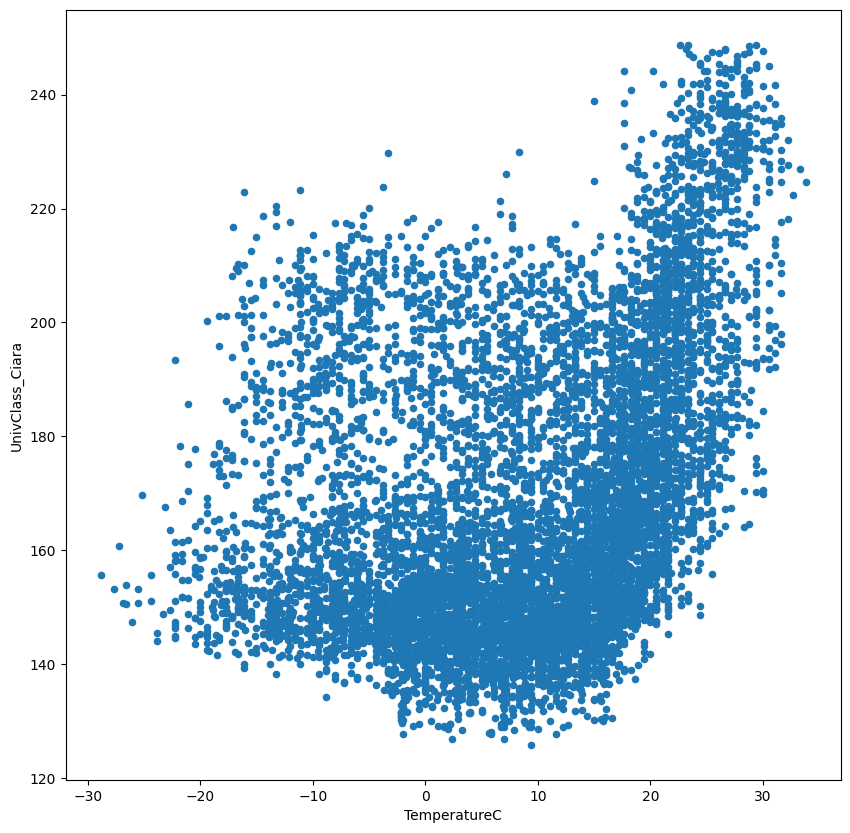

In [90]:
comparison.plot(kind='scatter', x='TemperatureC', y='UnivClass_Ciara', figsize=(10,10))

<Axes: xlabel='TemperatureC', ylabel='UnivClass_Ciara'>

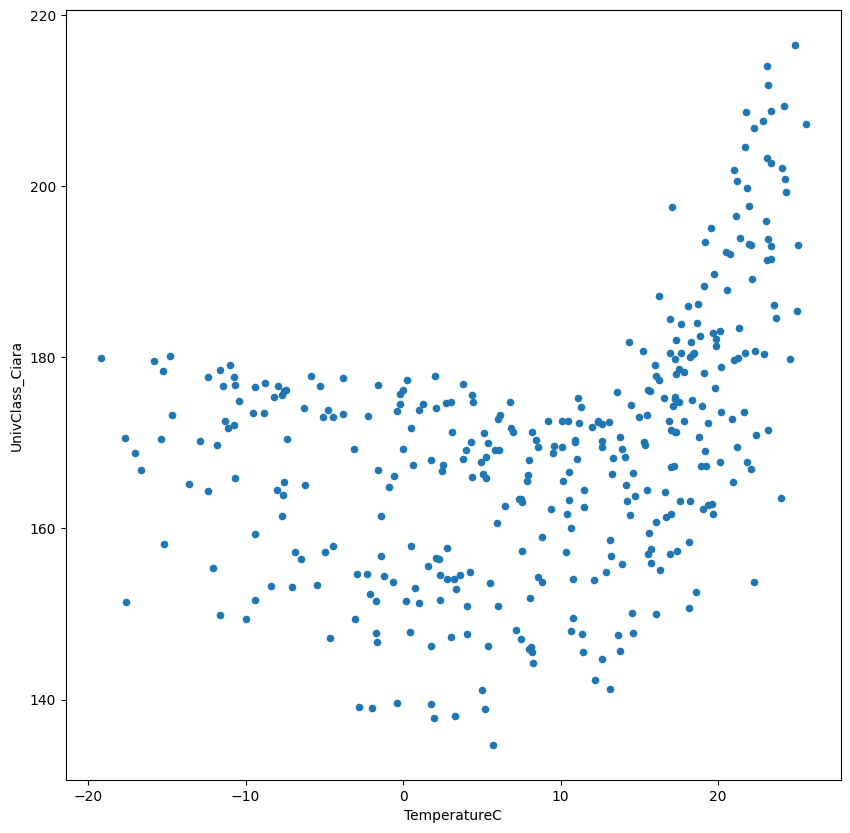

In [91]:
comparison.resample("D").mean().plot(kind='scatter', x='TemperatureC', y='UnivClass_Ciara', figsize=(10,10))

In [92]:
# Check for inf and NaN values
print("Number of inf values in TemperatureC:", np.isinf(comparison['TemperatureC']).sum())
print("Number of NaN values in TemperatureC:", np.isnan(comparison['TemperatureC']).sum())
print("Number of inf values in UnivClass_Ciara:", np.isinf(comparison['UnivClass_Ciara']).sum())
print("Number of NaN values in UnivClass_Ciara:", np.isnan(comparison['UnivClass_Ciara']).sum())

# Replace inf and NaN values with a suitable value (e.g., 0)
comparison.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
comparison.fillna(0, inplace=True)  # Replace NaN with 0 (or another appropriate value)

Number of inf values in TemperatureC: 0
Number of NaN values in TemperatureC: 2
Number of inf values in UnivClass_Ciara: 0
Number of NaN values in UnivClass_Ciara: 1


Using Pearson test for correlation

In [93]:
scipy.stats.pearsonr(comparison['TemperatureC'], comparison['UnivClass_Ciara'])

PearsonRResult(statistic=0.37713260344656313, pvalue=3.8646808470812164e-294)

**Conclusion:** A positive linear curve of the scatter plot indicates a postive correlation between temperature of the building and its energy consumption.
However it's pearson coeffficient value of 0.37 indicates that the correlation is not very strong possibly because there are two possible linear models at temperatures between -20 and 14 and temperatures above 14 which show different direction of correlation with the one above 14 degrees celsius being positive and steeper than the small negative correlation at between -20 and 14.
These two opposite correlations will cancel each other thus the strong positive correlation above 14 degrees is reduced significantly.
Further, its low p-value below alpha 0.05 indicates that a relationship between the temperature and energy consumption is possible

# Advanced Visualizations using Seaborn

From the above visuals, it is observed that there is a drastic change in correlation between energy consumption below temperature at around 14 degrees celsius and above it.

It seems like there are two linear models with a change point happening in this situation.

From -20 to about 14 degrees celsius, the correlation between the two variables is negative, while above 14 degrees celsius the correlation is positive.

As the outdoor air temperature increases to 14 degrees celsius, the amount of energy used for buiiding functions reduces. However, further increase in temperature above 14 degrees celsius will increase energy consumption.
Could be that more energy is used in cooling the building due to the hight outdoor temperature than the energy used in heating the building when the outdor temperature is below 14 degree celsius.

We can use other visualization techniques using the Seaborn library to visualize the two regions and draw a regression line between them

See the link below for further infromation on the seaborn library:
https://seaborn.pydata.org/

In [94]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     8760 non-null   float64
 1   UnivClass_Ciara  8760 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [95]:
comparison[comparison.TemperatureC > 14].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3269 entries, 2015-04-02 12:00:00 to 2015-12-25 14:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     3269 non-null   float64
 1   UnivClass_Ciara  3269 non-null   float64
dtypes: float64(2)
memory usage: 76.6 KB


In [96]:
def make_color_division(x):
  if x < 14:
    return "Heating"
  else:
    return "Cooling"

In [97]:
comparison = comparison.resample("D").mean()

In [98]:
comparison['heating_vs_cooling'] = comparison.TemperatureC.apply(lambda x: make_color_division(x))

In [99]:
comparison.head()

TemperatureC  UnivClass_Ciara heating_vs_cooling
timestamp                                                   
2015-01-01     -3.027083       149.362500            Heating
2015-01-02     -1.704167       151.513542            Heating
2015-01-03     -1.707639       147.725000            Heating
2015-01-04      7.135417       148.089584            Heating
2015-01-05     -7.598958       163.968750            Heating

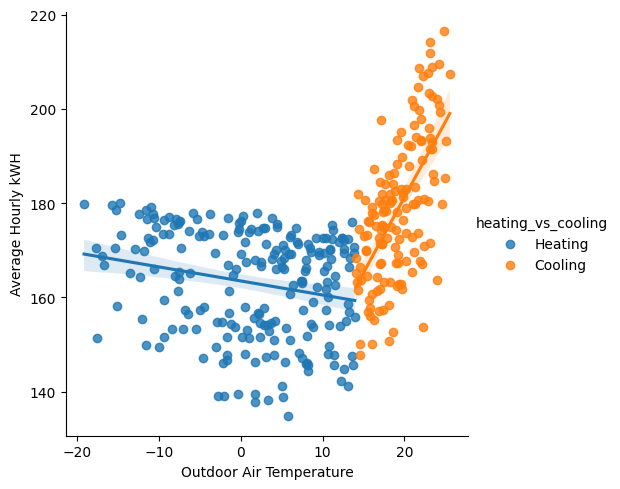

In [100]:
g = sns.lmplot(x="TemperatureC", y="UnivClass_Ciara", hue="heating_vs_cooling",
               truncate=True, data=comparison)

g.set_axis_labels("Outdoor Air Temperature", "Average Hourly kWH")

# **Analysis 2:** Analyzing weather influence on energy consumption of a building in the meta data file named: all_buildings_meta_data.csv.
Our analysis will focus on a building in the 'all_buildings_meta_data.csv' file that is located in **America/Phoenix**, having **College Laboratory** as `primaryspaceUsage` and having floor area larger than **30000** `sqm`

So as to perform time-series analyis of that building we will print out its attributes that we require for identification and retrival in the subsequent exercise i.e: the `uid`, `nickname`, `newweatherfilename` and `yearbuilt` of the building

In [101]:
 # CODE HERE TO USE `.chdir()` TO CHANGE THE DIRECTORY TO THE LOAD THE META DATA FILE
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/")
metadata = pd.read_csv('all_buildings_meta_data.csv')
metadata

uid         dataend       datastart  energystarscore  \
0      PrimClass_Everett  31/12/12 23:00  01/01/12 00:00              NaN   
1     UnivClass_Clifford  31/12/15 23:00  01/01/15 00:00              NaN   
2       Office_Elizabeth  31/12/12 23:00  01/01/12 00:00              NaN   
3           Office_Ellie  31/12/12 23:00  01/01/12 00:00              NaN   
4    PrimClass_Elisabeth  31/12/12 23:00  01/01/12 00:00              NaN   
..                   ...             ...             ...              ...   
502          Office_Lane  30/11/15 23:00  01/12/14 00:00              NaN   
503       Office_Cameron  31/12/15 23:00  01/01/15 00:00              NaN   
504          UnivLab_Lea  30/11/15 23:00  01/12/14 00:00              NaN   
505       UnivLab_Carlos  31/12/15 23:00  01/01/15 00:00              NaN   
506        UnivLab_Aoife  31/12/15 23:00  01/01/15 00:00              NaN   

      heatingtype             industry mainheatingtype  numberoffloors  \
0             NaN            Education             NaN             NaN   
1             NaN            Education             NaN             NaN   
2             NaN  Commercial Property             NaN             NaN   
3             NaN  Commercial Property             NaN             NaN   
4             NaN            Education             NaN             NaN   
..            ...                  ...             ...             ...   
502  Heat network            Education    Heat Network             8.0   
503           NaN            Education             NaN             NaN   
504           Gas            Education             Gas             6.0   
505           NaN            Education             NaN             NaN   
506           NaN            Education             NaN             NaN   

     occupants            primaryspaceusage rating         sqft           sqm  \
0          NaN  Primary/Secondary Classroom    NaN  105530.0000   9804.053590   
1          NaN            College Classroom    NaN   56969.0000   5292.591007   
2          NaN                       Office    NaN  294651.0000  27373.961850   
3          NaN                       Office    NaN  496517.0000  46127.918850   
4          NaN  Primary/Secondary Classroom    NaN  233062.0000  21652.158990   
..         ...                          ...    ...          ...           ...   
502        NaN                       Office    NaN   34455.2439   3201.000000   
503        NaN                       Office    NaN   53303.0000   4952.008609   
504        NaN           College Laboratory    NaN   16802.4479   1561.000000   
505        NaN           College Laboratory    NaN   30143.0000   2800.375129   
506        NaN           College Laboratory    NaN  261188.0000  24265.148760   

                  subindustry             timezone yearbuilt   nickname  \
0    Primary/Secondary School     America/New_York       NaN    Everett   
1          College/University     America/New_York      1967   Clifford   
2      Commercial Real Estate  America/Los_Angeles       NaN  Elizabeth   
3     Bank/Financial Services  America/Los_Angeles       NaN      Ellie   
4    Primary/Secondary School     America/New_York       NaN  Elisabeth   
..                        ...                  ...       ...        ...   
502        College/University        Europe/London      1907       Lane   
503        College/University     America/New_York      1981    Cameron   
504        College/University        Europe/London      1995        Lea   
505        College/University     America/New_York      1951     Carlos   
506        College/University      America/Phoenix       NaN      Aoife   

    primaryspaceuse_abbrev newweatherfilename  
0                PrimClass      weather12.csv  
1                UnivClass       weather2.csv  
2                   Office      weather22.csv  
3                   Office      weather28.csv  
4                PrimClass      weather23.csv  
..                     ...                ...

In [102]:
# read meta data file as pandas dataframe and assign to the corresponding variables
#os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/")
#metadata = pd.read_csv('all_buildings_meta_data.csv')
#metadata['primaryspaceusage'].unique()
metadata.head()

uid         dataend       datastart  energystarscore  \
0    PrimClass_Everett  31/12/12 23:00  01/01/12 00:00              NaN   
1   UnivClass_Clifford  31/12/15 23:00  01/01/15 00:00              NaN   
2     Office_Elizabeth  31/12/12 23:00  01/01/12 00:00              NaN   
3         Office_Ellie  31/12/12 23:00  01/01/12 00:00              NaN   
4  PrimClass_Elisabeth  31/12/12 23:00  01/01/12 00:00              NaN   

  heatingtype             industry mainheatingtype  numberoffloors  occupants  \
0         NaN            Education             NaN             NaN        NaN   
1         NaN            Education             NaN             NaN        NaN   
2         NaN  Commercial Property             NaN             NaN        NaN   
3         NaN  Commercial Property             NaN             NaN        NaN   
4         NaN            Education             NaN             NaN        NaN   

             primaryspaceusage rating      sqft           sqm  \
0  Primary/Secondary Classroom    NaN  105530.0   9804.053590   
1            College Classroom    NaN   56969.0   5292.591007   
2                       Office    NaN  294651.0  27373.961850   
3                       Office    NaN  496517.0  46127.918850   
4  Primary/Secondary Classroom    NaN  233062.0  21652.158990   

                subindustry             timezone yearbuilt   nickname  \
0  Primary/Secondary School     America/New_York       NaN    Everett   
1        College/University     America/New_York      1967   Clifford   
2    Commercial Real Estate  America/Los_Angeles       NaN  Elizabeth   
3   Bank/Financial Services  America/Los_Angeles       NaN      Ellie   
4  Primary/Secondary School     America/New_York       NaN  Elisabeth   

  primaryspaceuse_abbrev newweatherfilename  
0              PrimClass      weather12.csv  
1              UnivClass       weather2.csv  
2                 Office      weather22.csv  
3                 Office      weather28.csv  
4              PrimClass      weather23.csv

In [103]:
# Retrieve the required information according to the given conditions
data = metadata.loc[(metadata['timezone'] == 'America/Phoenix') & (metadata['primaryspaceusage'] == 'College Laboratory') & (metadata['sqm'] > 30000)]
filtered_metadata = print(data[['uid', 'nickname', 'newweatherfilename', 'yearbuilt']])
filtered_metadata

                 uid nickname newweatherfilename yearbuilt
448  UnivLab_Ashlynn  Ashlynn       weather0.csv      2012


From the code, we observe that the building meeting the abovementioned conditions is 'UnivLab_Ashlynn', whose weather filename is weather0.csv

We then have to read in the 'UnivLab_Ashlynn.csv' file into python so that we can get its energy consumption data.
Further, we are interested in investigating impact of its outdoor air temperature and humidity weather conditions on the energy consumption for a given time period.
We therefore have to get the time, temperature and humidity attributes of the building from its weather filename, weather0.csv

In [104]:
from ast import parse
# Load the specific energy consumption and weather data as identified
# YOUR CODE HERE
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")
Ashlynn_meter = pd.read_csv('UnivLab_Ashlynn.csv', index_col = "timestamp", parse_dates = True)
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/weather_data/")
weather0 = pd.read_csv('weather0.csv', index_col = "timestamp", parse_dates= True, usecols=['timestamp','TemperatureC', 'Humidity'])
weather0.head()
#Ashlynn_meter.head()

TemperatureC  Humidity
timestamp                                  
2015-01-01 00:51:00           2.8      79.0
2015-01-01 01:47:00           3.0      75.0
2015-01-01 01:51:00           2.8      79.0
2015-01-01 02:51:00           2.8      76.0
2015-01-01 03:51:00           2.2      82.0

In [105]:
# properly resample and concatenate both datasets
# YOUR CODE HERE
meter_data = Ashlynn_meter.resample('H').mean()
weather_data = weather0.resample('H').mean()
all_data = pd.concat([meter_data, weather_data], axis=1)
all_data.head()

UnivLab_Ashlynn  TemperatureC  Humidity
timestamp                                                   
2015-01-01 00:00:00           898.79           2.8      79.0
2015-01-01 01:00:00           887.98           2.9      77.0
2015-01-01 02:00:00           892.02           2.8      76.0
2015-01-01 03:00:00           889.06           2.2      82.0
2015-01-01 04:00:00           881.37           2.2      79.0

We need to calculate the weekly **total** energy consumptions and weekly **average** temperature and humidity, then save them in a DataFrame called `all_data_weekly`:


In [106]:
# Do the weekly calculation
weather_data_weekly = weather_data.resample('W').mean() # resmapling to weekly
meter_data_weekly = meter_data.resample('W').mean() # resampling to weekly
weather_data_weekly.head()
meter_data_weekly.head()
all_data_weekly = pd.concat([meter_data_weekly, weather_data_weekly], axis=1) # concatenating the weekly weather and meter (energy consumption datasets)
all_data_weekly.head(10)

UnivLab_Ashlynn  TemperatureC   Humidity
timestamp                                           
2015-01-04       909.274687      6.510937  59.343750
2015-01-11       946.166429     16.008929  44.773810
2015-01-18       950.499301     15.079762  55.090278
2015-01-25       934.178824     15.709821  32.485119
2015-02-01       908.884405     15.729315  70.260913
2015-02-08       904.012440     18.367857  50.428571
2015-02-15       899.561429     20.463690  36.541667
2015-02-22       906.004048     18.899405  34.839286
2015-03-01       913.627381     17.134821  44.276786
2015-03-08       923.470536     17.153075  42.097222

Our first analysis involves using the '.plot()'function to plot the bar chart of weekly temperature and enerrgy consumptions of the building during the month of July to September 2015.

array([<Axes: title={'center': 'UnivLab_Ashlynn'}, xlabel='timestamp'>,
       <Axes: title={'center': 'TemperatureC'}, xlabel='timestamp'>],
      dtype=object)

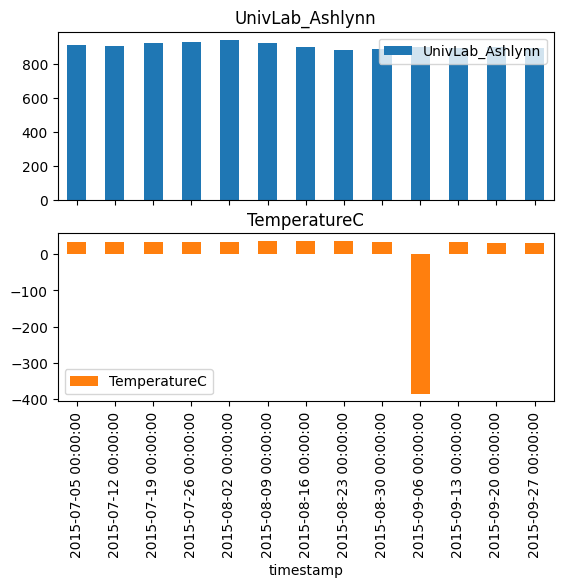

In [107]:
# Process and visualize the data as required

all_data_weekly.truncate(before = '2015-07-01', after='2015-09-30').plot.bar(y=['UnivLab_Ashlynn','TemperatureC'], subplots = True)


**Observation:** From the above visual, it is clear that week *2015-09-06* has an abnormal avergae temperature. This can also be observed by using the following code:


In [108]:
# Load the weather file and filter the data according to the criteria where temp < -40 is an abnormal temperature
filtered_data = all_data_weekly.loc[(all_data_weekly['TemperatureC'] < -40)]
# filtered_data
filtered_data.index[0]

Timestamp('2015-09-06 00:00:00')

### Fixing Outliers by Interpolating

Knowing when the outliers are,  we will clean the data in two steps:
1. replace the outliers with `np.nan`
2. We will then [`interpolate`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) the `np.nan` by linear method

After cleaning, we shall try to plot the hourly trend to confirm that the outliers have been removed with no gap.

In [109]:
# Rmoving outliers from the all_data (hourly data)
filtered_alldata = all_data.loc[(all_data['TemperatureC'] < -40)]
# filtered_alldata
filtered_alldata.index[0]

Timestamp('2015-08-31 21:00:00')

In [110]:
# Identifying the outlier and assigning to the variable
outlier_hourly = all_data['TemperatureC'] < -40
# replacing the outlier value with np.nan
all_data.loc[outlier_hourly, 'TemperatureC'] = np.nan
# interpolating the np.nan by linear method
all_data.interpolate(method='linear', inplace=True)
all_data.loc['2015-08-31 21:00:00']

UnivLab_Ashlynn    888.700000
TemperatureC        28.085185
Humidity            66.000000
Name: 2015-08-31 21:00:00, dtype: float64

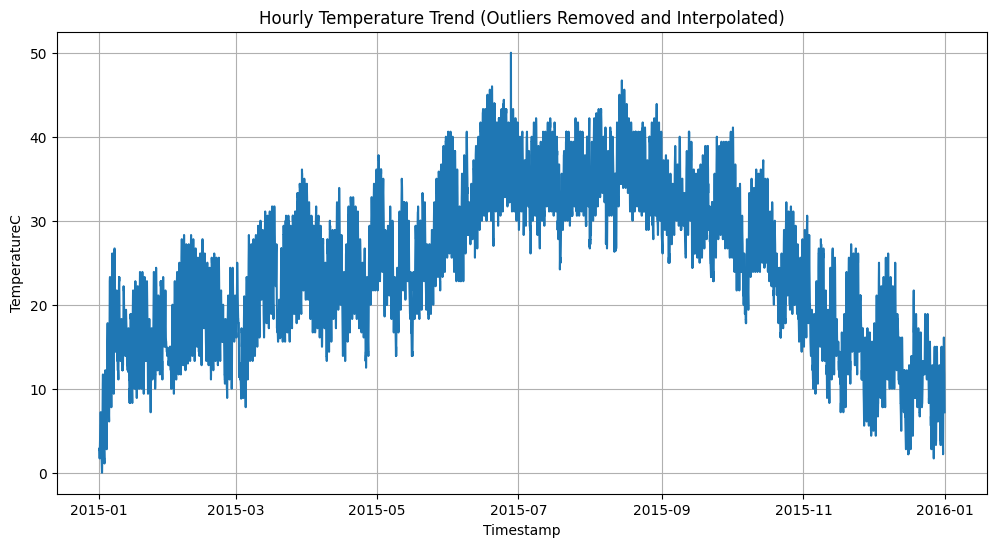

In [111]:
# Plot the hourly trend of TemperatureC
plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data['TemperatureC'])
plt.xlabel('Timestamp')
plt.ylabel('TemperatureC')
plt.title('Hourly Temperature Trend (Outliers Removed and Interpolated)')
plt.grid(True)
plt.show()

In [112]:
all_data # view all_data to confirm it was indeed hourly

UnivLab_Ashlynn  TemperatureC  Humidity
timestamp                                                   
2015-01-01 00:00:00           898.79           2.8      79.0
2015-01-01 01:00:00           887.98           2.9      77.0
2015-01-01 02:00:00           892.02           2.8      76.0
2015-01-01 03:00:00           889.06           2.2      82.0
2015-01-01 04:00:00           881.37           2.2      79.0
...                              ...           ...       ...
2015-12-31 19:00:00           869.86          12.2      28.0
2015-12-31 20:00:00           864.22          11.7      27.0
2015-12-31 21:00:00           884.05          10.0      31.0
2015-12-31 22:00:00           857.23           9.4      33.0
2015-12-31 23:00:00           858.44           7.2      40.0

[8760 rows x 3 columns]

## Normalization and Finding Highest Consuming Week

It is known that during a certain period, when the building is operated in a similar way, outdoor temeprature also have a strong influence on energy consumption. The figure below shows an example.

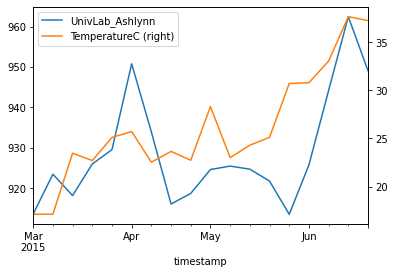

We now continue the analysis of the weekly data developed earlier to compare the weekly energy consumptions of the buildings:
1. We will generate by truncation the weekly data that has average energy consumption and temperature of the building during March and July
2. We will then normalize the weekly consumption with the average temperature in the week and answer: **which week has the highest temperature-free energy consumption?**

In [113]:
# Generating the weekly dataframe for the required period
all_data_weekly_marchtojuly = all_data_weekly.truncate(before = '2015-03-01', after = '2015-07-31')

In [114]:
# Normalizing against the mean TemperatureC:
all_data_weekly_marchtojuly['Normalized_values_Temp'] = all_data_weekly_marchtojuly['UnivLab_Ashlynn'].div(all_data_weekly_marchtojuly['TemperatureC'])
all_data_weekly_marchtojuly['Normalized_values_Hum'] = all_data_weekly_marchtojuly['UnivLab_Ashlynn'].div(all_data_weekly_marchtojuly['Humidity'])
all_data_weekly_marchtojuly


UnivLab_Ashlynn  TemperatureC   Humidity  Normalized_values_Temp  \
timestamp                                                                      
2015-03-01       913.627381     17.134821  44.276786               53.319924   
2015-03-08       923.470536     17.153075  42.097222               53.837024   
2015-03-15       918.179821     23.472619  22.723214               39.117059   
2015-03-22       925.996399     22.712500  39.017857               40.770342   
2015-03-29       929.554405     25.110714  18.208333               37.018238   
2015-04-05       950.781369     25.718452  15.660714               36.968841   
2015-04-12       933.933810     22.540476  16.455357               41.433633   
2015-04-19       916.095595     23.660714  16.684524               38.718003   
2015-04-26       918.719554     22.699401  30.107784               40.473295   
2015-05-03       924.630610     28.305655  21.833333               32.665933   
2015-05-10       925.474464     23.022272  33.782242               40.199094   
2015-05-17       924.714464     24.300893  32.713790               38.052695   
2015-05-24       921.771310     25.120238  24.291667               36.694370   
2015-05-31       913.543810     30.696429  17.354167               29.760589   
2015-06-07       925.749702     30.788889  23.033730               30.067655   
2015-06-14       944.190774     33.028571  25.196429               28.587091   
2015-06-21       962.452560     37.700000  13.500000               25.529246   
2015-06-28       949.076369     37.228770  20.302579               25.493090   
2015-07-05       910.484643     35.103693  32.867265               25.937005   
2015-07-12       904.062262     34.740476  22.208333               26.023312   
2015-07-19       924.045298     34.390972  33.340278               26.868833   
2015-07-26       928.820595     35.323512  23.217262               26.294684   

            Normalized_values_Hum  
timestamp                          
2015-03-01              20.634456  
2015-03-08              21.936615  
2015-03-15              40.407128  
2015-03-22              23.732631  
2015-03-29              51.051043  
2015-04-05              60.711239  
2015-04-12              56.755609  
2015-04-19              54.906907  
2015-04-26              30.514353  
2015-05-03              42.349494  
2015-05-10              27.395294  
2015-05-17              28.266810  
2015-05-24              37.945989  
2015-05-31              52.641180  
2015-06-07              40.191046  
2015-06-14              37.473199  
2015-06-21              71.292782  
2015-06-28              46.746591  
2015-07-05              27.701868  
2015-07-12              40.708244  
2015-07-19              27.715585  
2015-07-26              40.005604

In [115]:
# Identifying the maximum Normalized consumption:
# Normalized by Outdooor Air Temperature Max Consumption:
max_norm_consumption_temp = all_data_weekly_marchtojuly['Normalized_values_Temp'].max()
# Normalized by Humidity max consumption:
max_norm_consumption_hum = all_data_weekly_marchtojuly['Normalized_values_Hum'].max()
print(f"The maximum normalized- by - outdoor air temperature consumption is: {max_norm_consumption_temp}")
print(f"The maximum normalized- by - humidity consumption is: {max_norm_consumption_hum}")

The maximum normalized- by - outdoor air temperature consumption is: 53.837024227457015
The maximum normalized- by - humidity consumption is: 71.29278218694886


In [116]:
# Finding the week with the highest normalized consumption
index_of_max_temp = all_data_weekly_marchtojuly['Normalized_values_Temp'].idxmax()
timestamp_of_max_temp = all_data_weekly_marchtojuly.loc[index_of_max_temp].name
print(f"The week with the highest normalized consumption by temperature is: {timestamp_of_max_temp}")
index_of_max_hum = all_data_weekly_marchtojuly['Normalized_values_Hum'].idxmax()
timestamp_of_max_hum = all_data_weekly_marchtojuly.loc[index_of_max_hum].name
print(f"The week with the highest normalized consumption by humidity is: {timestamp_of_max_hum}")

The week with the highest normalized consumption by temperature is: 2015-03-08 00:00:00
The week with the highest normalized consumption by humidity is: 2015-06-21 00:00:00


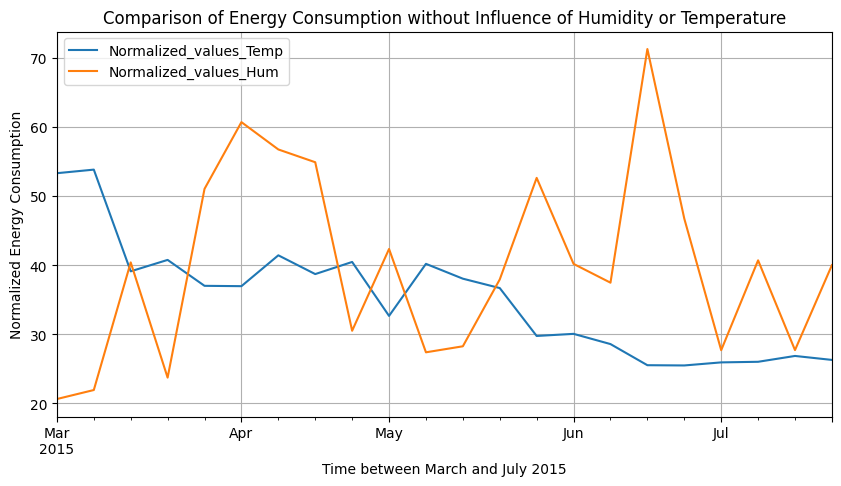

In [117]:
# Plot the line chart
all_data_weekly_marchtojuly[['Normalized_values_Temp', 'Normalized_values_Hum']].plot(figsize=(10, 5))
plt.xlabel('Time between March and July 2015')
plt.ylabel('Normalized Energy Consumption')
plt.title('Comparison of Energy Consumption without Influence of Humidity or Temperature')
plt.grid(True)
plt.show()

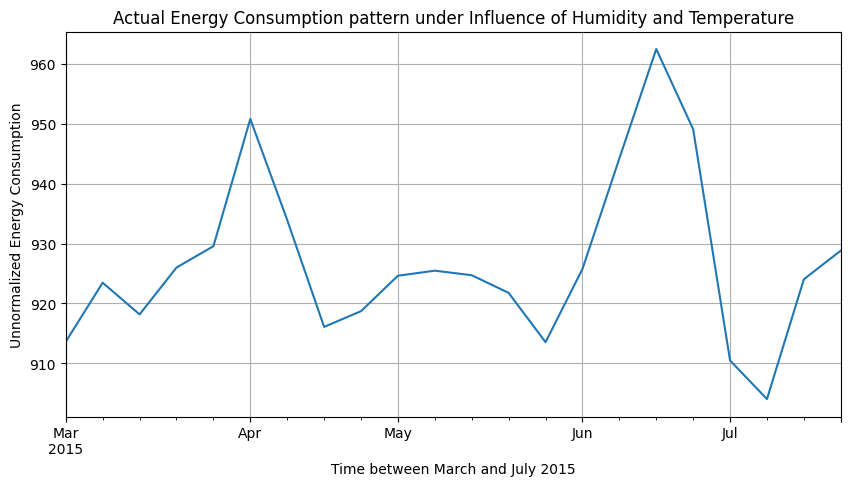

In [118]:
# Plot the line chart
all_data_weekly_marchtojuly['UnivLab_Ashlynn'].plot(figsize=(10, 5))
plt.xlabel('Time between March and July 2015')
plt.ylabel('Unnormalized Energy Consumption')
plt.title('Actual Energy Consumption pattern under Influence of Humidity and Temperature')
plt.grid(True)
plt.show()

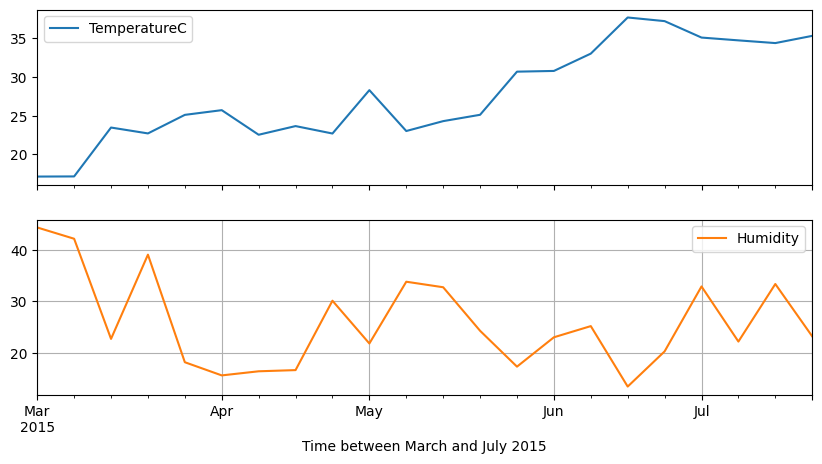

In [119]:
# Plot the line chart
all_data_weekly_marchtojuly[['TemperatureC', 'Humidity']].plot(figsize=(10, 5), subplots = True)
plt.xlabel('Time between March and July 2015')
plt.grid(True)
plt.show()

**Correlation Between Temperature and Building Energy Consumption (normalized)**


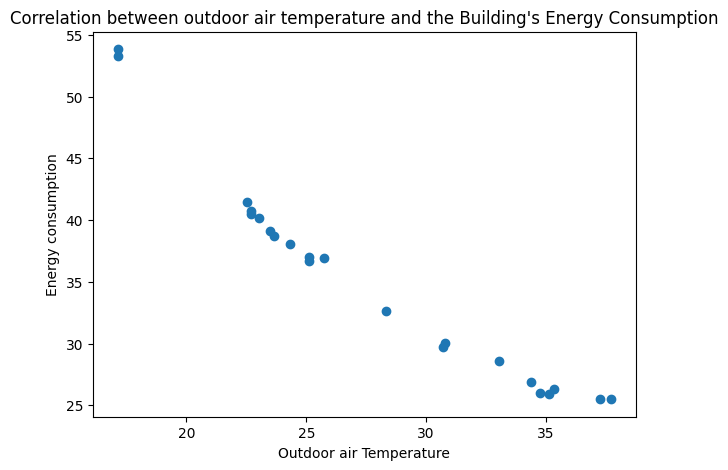

In [120]:
import matplotlib.pyplot as plt  # Import the plotting library

plt.figure(figsize=(7, 5))  # Set the figure size
plt.scatter(x=all_data_weekly_marchtojuly['TemperatureC'],
            y=all_data_weekly_marchtojuly['Normalized_values_Temp'])
plt.xlabel('Outdoor air Temperature')  # Label the x-axis
plt.ylabel('Energy consumption')  # Label the y-axis
plt.title("Correlation between outdoor air temperature and the Building's Energy Consumption")  # Set the title of the plot
plt.show()  # Display the plot

We now perform a pearson correlation test to get an idea on the strength of the correlatio between outdoor air temperature and building's energy consumption:

In [121]:
import scipy.stats
Correlation_value, P_value = scipy.stats.pearsonr(all_data_weekly_marchtojuly['Normalized_values_Temp'], all_data_weekly_marchtojuly['TemperatureC'])
print("Correlation value: {0}, P-Value: {1}".format(Correlation_value,P_value))

Correlation value: -0.969369093436257, P-Value: 1.1564320068853913e-13


**Correlation Between Humidity and Building Energy Consumption (normalized)**

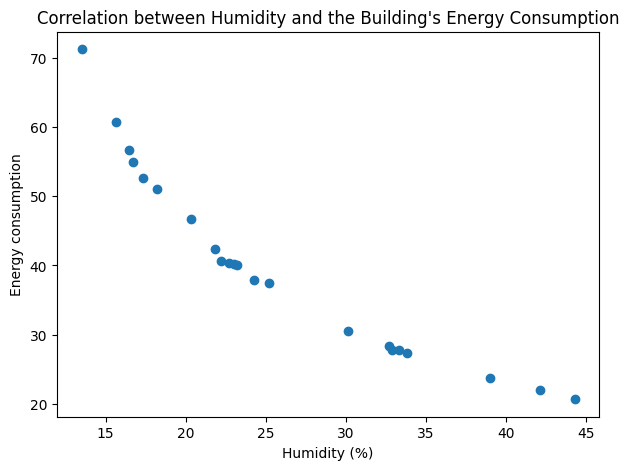

In [122]:
plt.figure(figsize=(7, 5))  # Set the figure size
plt.scatter(x=all_data_weekly_marchtojuly['Humidity'],
            y=all_data_weekly_marchtojuly['Normalized_values_Hum'])
plt.xlabel('Humidity (%)')  # Label the x-axis
plt.ylabel('Energy consumption')  # Label the y-axis
plt.title("Correlation between Humidity and the Building's Energy Consumption")  # Set the title of the plot
plt.show()  # Display the plot

Pearson correlation test to get an idea on the strength of the correlation between humidity and building's energy consumption:

In [123]:
Correlation_value, P_value = scipy.stats.pearsonr(all_data_weekly_marchtojuly['Normalized_values_Hum'], all_data_weekly_marchtojuly['Humidity'])
print("Correlation value: {0}, P-Value: {1}".format(Correlation_value,P_value))

Correlation value: -0.9402875957690617, P-Value: 8.11879513529792e-11


**Conclusion**

Temperature and Humidity are important factors that can influence the amount of energy a building can consume. Normalizing these factors gives us an understanding of the behaviour of this building's energy consumption independent of these environmental/ external factors.

Energy consumption of the building upon normalizing temperature and humidity provide strong negative correlations at -0.97 and -0.94 respectively. This mean s that as either temperature or humidity increases, the normalized energy consumption decreases. Possible reasons for this:
- **Energy Efficiency:** A positive sign for energy management since he building is more efficient at higher temperatures
- **Behavioral adjustments:** Occupants seem to be adjusting their behaviours in response to higher temperatures or humidity by using natural ventilation
- **Seasonal Variation:** Since the months under investigations are hotter and humidity is generally lower(with cooler humidity), there is less need for heating
- **Energy Managment Practices:** The building is possibly implementing energy-saving practices more rigorously during hotter periods

In our analysis, we worked under the null hypothesis indicating that there is no relationship between normalized energy consumption and temperature or humidity. The alterative hpothesis is the existence of a relationship between normalized energy consumption and temperature or humidity. Our alpha value for the hypothesis testing is 0.05.

Analysing for both temperature and humidity, we observe very low p-values of:
  - temperature: pvalue=1.1564320068853913e-13
  - humidity: pvalue=8.11879513529792e-11

These values are less than 0.05. So we can conclusively say that the probabilty of a relationship in energy consumption of the building with either temperature or humidity is likely.

**Implications:**
1. There are opportnitites for further optimizing energy usage. These include:
  - enhancing cooling system efficiency
  - promoting energy- saving bahaviours among occupants (since they obviously work)
2. Predictive Modelling: We can improve our predicitve models for energy consumption, leading to better planning and resource allocation